In [1]:
import json
import pandas as pd
import copy
import glob
import cv2
import matplotlib.pyplot as plt
import sys
import os
import numpy as np
sys.path.append(os.path.join('./','../pyunet'))
from lib.unet import UNet
from modules.train import Train
import torch
from lib.utils import get_image, get_mask, get_predicted_img
import glob
from sklearn.model_selection import train_test_split
import shutil
from sklearn.metrics import jaccard_score

In [2]:
img_dir  = "./images/covid19ctscan/images/"
mask_dir = "./images/covid19ctscan/masks/"

tmp_dir = "./tmp"

if os.path.exists(tmp_dir):
    shutil.rmtree(tmp_dir)

train_images_dir = "./tmp/train/images/"
train_masks_dir  = "./tmp/train/masks/"

test_images_dir  = "./tmp/test/images/"
test_masks_dir   = "./tmp/test/masks/"

os.makedirs(train_images_dir)
os.makedirs(train_masks_dir)
os.makedirs(test_images_dir)
os.makedirs(test_masks_dir)

images = sorted(glob.glob("{}/*".format(img_dir)))
masks  = sorted(glob.glob("{}/*".format(mask_dir)))

train_images, test_images, train_masks, test_masks = train_test_split(
    images,
    masks,
    test_size=0.3,
    random_state=42
)

for img_file in train_images:
    shutil.copy(img_file, train_images_dir)
    
for img_file in train_masks:
    shutil.copy(img_file, train_masks_dir)
    
for img_file in test_images:
    shutil.copy(img_file, test_images_dir)
    
for img_file in test_masks:
    shutil.copy(img_file, test_masks_dir)
    
    

In [3]:
img_height     = 128
img_width      = 128
device         = 'cuda'
gpu_index      = 0
input_img_dir  = train_images_dir
input_mask_dir = train_masks_dir
model_file     = "test.pth"
epochs         = 1000
learning_rate  = 0.0001
in_channels    = 3
out_channels   = 4
is_normalized  = True
batch_size     = 1
loss_type      = 'CE'
is_residual    = True
double_skip    = True

params = {
    'img_height':     img_height,
    'img_width':      img_width,
    'device':         device,
    'gpu_index':      gpu_index,
    'input_img_dir':  input_img_dir,
    'input_mask_dir': input_mask_dir,
    'epochs':         epochs,
    'learning_rate':  learning_rate,
    'in_channels':    in_channels,
    'out_channels':   out_channels,
    'is_normalized':  is_normalized,
    'loss_type':      loss_type,
    'batch_size':     batch_size,
    'model_file':     model_file,
    'is_residual':    is_residual,
    'double_skip':    double_skip
}

cmd = Train(params=params)

cmd.execute()

model = cmd.model

Training model...
Using regularization...
input_img_dir: ./tmp/train/images/
input_mask_dir: ./tmp/train/masks/
CUDA Device: NVIDIA GeForce RTX 3050 Laptop GPU
UNet(
  (ups): ModuleList(
    (0): ConvTranspose2d(1024, 512, kernel_size=(2, 2), stride=(2, 2))
    (1): NormalizedDoubleConv(
      (first_conv): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (first_norm): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
      (first_actv): PReLU(num_parameters=512)
      (second_conv): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (second_norm): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=False)
      (second_actv): PReLU(num_parameters=512)
      (skip_conn): Sequential(
        (0): Conv2d(1024, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): InstanceNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_run

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.63it/s, loss=1.03]


Ave Loss: 1.1797023432595388
Saving model to test.pth...
Epoch: 1


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.70it/s, loss=0.842]


Ave Loss: 0.8943239901747022
Saving model to test.pth...
Epoch: 2


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.67it/s, loss=0.692]


Ave Loss: 0.7208605527877807
Saving model to test.pth...
Epoch: 3


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.55it/s, loss=0.563]


Ave Loss: 0.583060616680554
Saving model to test.pth...
Epoch: 4


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=0.466]


Ave Loss: 0.47579495736530847
Saving model to test.pth...
Epoch: 5


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.59it/s, loss=0.408]


Ave Loss: 0.39977826688970836
Saving model to test.pth...
Epoch: 6


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.53it/s, loss=0.374]


Ave Loss: 0.33996295290333883
Saving model to test.pth...
Epoch: 7


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=0.32]


Ave Loss: 0.29217874386480874
Saving model to test.pth...
Epoch: 8


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=0.283]


Ave Loss: 0.2539629014475005
Saving model to test.pth...
Epoch: 9


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=0.255]


Ave Loss: 0.2279207597885813
Saving model to test.pth...
Epoch: 10


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=0.252]


Ave Loss: 0.20696511396339962
Saving model to test.pth...
Epoch: 11


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.58it/s, loss=0.216]


Ave Loss: 0.18434892892837523
Saving model to test.pth...
Epoch: 12


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=0.202]


Ave Loss: 0.16720513020242964
Saving model to test.pth...
Epoch: 13


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=0.194]


Ave Loss: 0.15143393043960843
Saving model to test.pth...
Epoch: 14


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=0.179]


Ave Loss: 0.1366505425955568
Saving model to test.pth...
Epoch: 15


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.36it/s, loss=0.169]


Ave Loss: 0.1277357447360243
Saving model to test.pth...
Epoch: 16


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.39it/s, loss=0.172]


Ave Loss: 0.12433042707187789
Saving model to test.pth...
Epoch: 17


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.42it/s, loss=0.156]


Ave Loss: 0.12071026797805513
Saving model to test.pth...
Epoch: 18


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.155]


Ave Loss: 0.11266557701996395
Saving model to test.pth...
Epoch: 19


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.39it/s, loss=0.15]


Ave Loss: 0.10003631088350501
Saving model to test.pth...
Epoch: 20


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=0.154]


Ave Loss: 0.10138910444719451
Saving model to test.pth...
Epoch: 21


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.14it/s, loss=0.142]


Ave Loss: 0.10394846807633128
Saving model to test.pth...
Epoch: 22


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.12it/s, loss=0.123]


Ave Loss: 0.08828033560088702
Saving model to test.pth...
Epoch: 23


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.13it/s, loss=0.118]


Ave Loss: 0.08484479635953904
Saving model to test.pth...
Epoch: 24


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.13it/s, loss=0.115]


Ave Loss: 0.07929567056042808
Saving model to test.pth...
Epoch: 25


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.15it/s, loss=0.133]


Ave Loss: 0.07659758124500513
Saving model to test.pth...
Epoch: 26


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.15it/s, loss=0.12]


Ave Loss: 0.07419468930789402
Saving model to test.pth...
Epoch: 27


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.18it/s, loss=0.117]


Ave Loss: 0.06854959572000163
Saving model to test.pth...
Epoch: 28


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.16it/s, loss=0.102]


Ave Loss: 0.06796623122479234
Saving model to test.pth...
Epoch: 29


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.16it/s, loss=0.0962]


Ave Loss: 0.060838919478867735
Saving model to test.pth...
Epoch: 30


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.14it/s, loss=0.0853]


Ave Loss: 0.056914831857596125
Saving model to test.pth...
Epoch: 31


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.16it/s, loss=0.08]


Ave Loss: 0.05276900247803756
Saving model to test.pth...
Epoch: 32


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.16it/s, loss=0.0923]


Ave Loss: 0.05147135286991086
Saving model to test.pth...
Epoch: 33


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.10it/s, loss=0.0753]


Ave Loss: 0.05187204017170838
Saving model to test.pth...
Epoch: 34


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.16it/s, loss=0.0789]


Ave Loss: 0.05064805261790752
Saving model to test.pth...
Epoch: 35


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.15it/s, loss=0.0691]


Ave Loss: 0.04830832731510912
Saving model to test.pth...
Epoch: 36


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.14it/s, loss=0.0719]


Ave Loss: 0.04932790592844997
Saving model to test.pth...
Epoch: 37


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.16it/s, loss=0.0771]


Ave Loss: 0.05066539113010679
Saving model to test.pth...
Epoch: 38


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.12it/s, loss=0.0869]


Ave Loss: 0.05567782812618784
Saving model to test.pth...
Epoch: 39


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.19it/s, loss=0.0757]


Ave Loss: 0.05470048367444958
Saving model to test.pth...
Epoch: 40


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.15it/s, loss=0.0638]


Ave Loss: 0.04437119790485927
Saving model to test.pth...
Epoch: 41


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.14it/s, loss=0.0639]


Ave Loss: 0.03937715448971305
Saving model to test.pth...
Epoch: 42


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.16it/s, loss=0.0577]


Ave Loss: 0.03462457197851369
Saving model to test.pth...
Epoch: 43


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.15it/s, loss=0.0461]


Ave Loss: 0.03448228748249156
Saving model to test.pth...
Epoch: 44


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.13it/s, loss=0.0411]


Ave Loss: 0.032983632971133506
Saving model to test.pth...
Epoch: 45


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.13it/s, loss=0.0444]


Ave Loss: 0.031773724353739194
Saving model to test.pth...
Epoch: 46


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.10it/s, loss=0.0566]


Ave Loss: 0.03147222601941654
Saving model to test.pth...
Epoch: 47


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.15it/s, loss=0.0409]


Ave Loss: 0.032768187139715466
Saving model to test.pth...
Epoch: 48


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.17it/s, loss=0.0405]


Ave Loss: 0.03163290581932025
Saving model to test.pth...
Epoch: 49


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.13it/s, loss=0.0398]


Ave Loss: 0.030667010222428612
Saving model to test.pth...
Epoch: 50


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 12.93it/s, loss=0.0421]


Ave Loss: 0.0321489085576364
Saving model to test.pth...
Epoch: 51


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 12.78it/s, loss=0.0446]


Ave Loss: 0.030366144076521908
Saving model to test.pth...
Epoch: 52


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=0.0635]


Ave Loss: 0.0286207669680672
Saving model to test.pth...
Epoch: 53


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.36it/s, loss=0.0436]


Ave Loss: 0.02867153917572328
Saving model to test.pth...
Epoch: 54


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.36it/s, loss=0.0377]


Ave Loss: 0.027948502770492007
Saving model to test.pth...
Epoch: 55


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.36it/s, loss=0.0321]


Ave Loss: 0.027078065163056764
Saving model to test.pth...
Epoch: 56


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.36it/s, loss=0.0356]


Ave Loss: 0.025322521344891616
Saving model to test.pth...
Epoch: 57


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=0.0458]


Ave Loss: 0.023433908467580165
Saving model to test.pth...
Epoch: 58


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.0357]


Ave Loss: 0.024275176413357257
Saving model to test.pth...
Epoch: 59


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=0.0307]


Ave Loss: 0.022837969813761967
Saving model to test.pth...
Epoch: 60


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.35it/s, loss=0.0276]


Ave Loss: 0.02205364890396595
Saving model to test.pth...
Epoch: 61


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.35it/s, loss=0.0279]


Ave Loss: 0.02191788060590625
Saving model to test.pth...
Epoch: 62


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=0.0354]


Ave Loss: 0.02049385353789798
Saving model to test.pth...
Epoch: 63


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.36it/s, loss=0.0329]


Ave Loss: 0.01868278155369418
Saving model to test.pth...
Epoch: 64


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.35it/s, loss=0.0247]


Ave Loss: 0.01890280755635883
Saving model to test.pth...
Epoch: 65


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.36it/s, loss=0.0265]


Ave Loss: 0.020435613829509487
Saving model to test.pth...
Epoch: 66


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.36it/s, loss=0.0356]


Ave Loss: 0.020193478524950997
Saving model to test.pth...
Epoch: 67


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.36it/s, loss=0.0298]


Ave Loss: 0.02083974191918969
Saving model to test.pth...
Epoch: 68


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.37it/s, loss=0.0274]


Ave Loss: 0.024113607413268515
Saving model to test.pth...
Epoch: 69


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=0.0272]


Ave Loss: 0.02161484718588846
Saving model to test.pth...
Epoch: 70


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=0.0236]


Ave Loss: 0.019517234905755947
Saving model to test.pth...
Epoch: 71


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=0.033]


Ave Loss: 0.01908323477421488
Saving model to test.pth...
Epoch: 72


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=0.0258]


Ave Loss: 0.01750234558380076
Saving model to test.pth...
Epoch: 73


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.35it/s, loss=0.0249]


Ave Loss: 0.01704396399270211
Saving model to test.pth...
Epoch: 74


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.37it/s, loss=0.0256]


Ave Loss: 0.01598470117231565
Saving model to test.pth...
Epoch: 75


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=0.0195]


Ave Loss: 0.014988334087787995
Saving model to test.pth...
Epoch: 76


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.35it/s, loss=0.0186]


Ave Loss: 0.012882489661153938
Saving model to test.pth...
Epoch: 77


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=0.0166]


Ave Loss: 0.011487418203614652
Saving model to test.pth...
Epoch: 78


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=0.0173]


Ave Loss: 0.010264781466685236
Saving model to test.pth...
Epoch: 79


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.37it/s, loss=0.0154]


Ave Loss: 0.009458496476457055
Saving model to test.pth...
Epoch: 80


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=0.0134]


Ave Loss: 0.008786399715713092
Saving model to test.pth...
Epoch: 81


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.37it/s, loss=0.014]


Ave Loss: 0.008424600917247256
Saving model to test.pth...
Epoch: 82


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.35it/s, loss=0.0122]


Ave Loss: 0.008280545158777386
Saving model to test.pth...
Epoch: 83


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.38it/s, loss=0.0145]


Ave Loss: 0.008632300827386124
Saving model to test.pth...
Epoch: 84


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.38it/s, loss=0.0122]


Ave Loss: 0.009622300181737436
Saving model to test.pth...
Epoch: 85


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=0.028]


Ave Loss: 0.010486361988088382
Saving model to test.pth...
Epoch: 86


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=0.0178]


Ave Loss: 0.010937917797959277
Saving model to test.pth...
Epoch: 87


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=0.0172]


Ave Loss: 0.0121338483810957
Saving model to test.pth...
Epoch: 88


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=0.0162]


Ave Loss: 0.013268165230484946
Saving model to test.pth...
Epoch: 89


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.36it/s, loss=0.0241]


Ave Loss: 0.01196780241693237
Saving model to test.pth...
Epoch: 90


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.37it/s, loss=0.0159]


Ave Loss: 0.00921588224757995
Saving model to test.pth...
Epoch: 91


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=0.00947]


Ave Loss: 0.007924295160254197
Saving model to test.pth...
Epoch: 92


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=0.0113]


Ave Loss: 0.006308411419325109
Saving model to test.pth...
Epoch: 93


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.36it/s, loss=0.00957]


Ave Loss: 0.005776017187495849
Saving model to test.pth...
Epoch: 94


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.35it/s, loss=0.00825]


Ave Loss: 0.005552525996297066
Saving model to test.pth...
Epoch: 95


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=0.0079]


Ave Loss: 0.0052328828306469535
Saving model to test.pth...
Epoch: 96


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.37it/s, loss=0.00679]


Ave Loss: 0.0043292418488168295
Saving model to test.pth...
Epoch: 97


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=0.00704]


Ave Loss: 0.0037901519722903947
Saving model to test.pth...
Epoch: 98


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=0.00549]


Ave Loss: 0.003583754722993555
Saving model to test.pth...
Epoch: 99


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=0.00411]


Ave Loss: 0.0032090530514584056
Saving model to test.pth...
Epoch: 100


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=0.00486]


Ave Loss: 0.002884042258041778
Saving model to test.pth...
Epoch: 101


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.36it/s, loss=0.00376]


Ave Loss: 0.0026850703779408443
Saving model to test.pth...
Epoch: 102


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.37it/s, loss=0.00832]


Ave Loss: 0.0024432812684348653
Saving model to test.pth...
Epoch: 103


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.00435]


Ave Loss: 0.002337552115620513
Saving model to test.pth...
Epoch: 104


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=0.00439]


Ave Loss: 0.002458510545797513
Saving model to test.pth...
Epoch: 105


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.0051]


Ave Loss: 0.0021380767034965436
Saving model to test.pth...
Epoch: 106


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.35it/s, loss=0.00255]


Ave Loss: 0.0019214772116226543
Saving model to test.pth...
Epoch: 107


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=0.00215]


Ave Loss: 0.0017112998063177137
Saving model to test.pth...
Epoch: 108


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.00247]


Ave Loss: 0.0014753219771331974
Saving model to test.pth...
Epoch: 109


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=0.00334]


Ave Loss: 0.0014270258734800985
Saving model to test.pth...
Epoch: 110


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=0.002]


Ave Loss: 0.001216895236367626
Saving model to test.pth...
Epoch: 111


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=0.00157]


Ave Loss: 0.0009447309296644692
Saving model to test.pth...
Epoch: 112


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.35it/s, loss=0.00174]


Ave Loss: 0.0008176117979538893
Saving model to test.pth...
Epoch: 113


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.37it/s, loss=0.00206]


Ave Loss: 0.0008594623272074386
Saving model to test.pth...
Epoch: 114


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=0.00223]


Ave Loss: 0.0007974335911317862
Saving model to test.pth...
Epoch: 115


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=0.00144]


Ave Loss: 0.0007029133886265169
Saving model to test.pth...
Epoch: 116


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.00102]


Ave Loss: 0.0006122631810805095
Saving model to test.pth...
Epoch: 117


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.000952]


Ave Loss: 0.0005665116427865411
Saving model to test.pth...
Epoch: 118


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.000966]


Ave Loss: 0.0005863485564727203
Saving model to test.pth...
Epoch: 119


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=0.0012]


Ave Loss: 0.000598342421705768
Saving model to test.pth...
Epoch: 120


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=0.00183]


Ave Loss: 0.0007618106602291976
Saving model to test.pth...
Epoch: 121


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=0.00277]


Ave Loss: 0.0012887857920889343
Saving model to test.pth...
Epoch: 122


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=0.0141]


Ave Loss: 0.0037009543323490235
Saving model to test.pth...
Epoch: 123


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=0.0238]


Ave Loss: 0.013693382744843672
Saving model to test.pth...
Epoch: 124


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=0.164]


Ave Loss: 0.09793514754689697
Saving model to test.pth...
Epoch: 125


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.0526]


Ave Loss: 0.08787654347584715
Saving model to test.pth...
Epoch: 126


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.0236]


Ave Loss: 0.026732357584738305
Saving model to test.pth...
Epoch: 127


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=0.0105]


Ave Loss: 0.01137785575785009
Saving model to test.pth...
Epoch: 128


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.00671]


Ave Loss: 0.006034311712054269
Saving model to test.pth...
Epoch: 129


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=0.00436]


Ave Loss: 0.003647831785825214
Saving model to test.pth...
Epoch: 130


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=0.00313]


Ave Loss: 0.0024500277741546076
Saving model to test.pth...
Epoch: 131


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=0.00244]


Ave Loss: 0.0018134717072825878
Saving model to test.pth...
Epoch: 132


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.00252]


Ave Loss: 0.001431947960684608
Saving model to test.pth...
Epoch: 133


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.00194]


Ave Loss: 0.001184412366377988
Saving model to test.pth...
Epoch: 134


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=0.00191]


Ave Loss: 0.0010116970145775538
Saving model to test.pth...
Epoch: 135


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=0.0014]


Ave Loss: 0.0008688504649658821
Saving model to test.pth...
Epoch: 136


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=0.00114]


Ave Loss: 0.0007773178849934734
Saving model to test.pth...
Epoch: 137


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=0.00121]


Ave Loss: 0.0007001383471236165
Saving model to test.pth...
Epoch: 138


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.000857]


Ave Loss: 0.0006183080079998555
Saving model to test.pth...
Epoch: 139


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=0.00081]


Ave Loss: 0.0005709414996090345
Saving model to test.pth...
Epoch: 140


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.00122]


Ave Loss: 0.000529391852407051
Saving model to test.pth...
Epoch: 141


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=0.000804]


Ave Loss: 0.0005024859781510064
Saving model to test.pth...
Epoch: 142


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.00129]


Ave Loss: 0.0005051760526839644
Saving model to test.pth...
Epoch: 143


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.00106]


Ave Loss: 0.0005102102068901462
Saving model to test.pth...
Epoch: 144


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=0.000752]


Ave Loss: 0.00048082880696581143
Saving model to test.pth...
Epoch: 145


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=0.000642]


Ave Loss: 0.00043265271545221495
Saving model to test.pth...
Epoch: 146


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.35it/s, loss=0.000482]


Ave Loss: 0.000351252628232552
Saving model to test.pth...
Epoch: 147


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=0.000434]


Ave Loss: 0.00030975938965899073
Saving model to test.pth...
Epoch: 148


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=0.000406]


Ave Loss: 0.0002873700359486975
Saving model to test.pth...
Epoch: 149


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=0.000382]


Ave Loss: 0.0002710376345411143
Saving model to test.pth...
Epoch: 150


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=0.000361]


Ave Loss: 0.00025665178421019975
Saving model to test.pth...
Epoch: 151


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=0.000342]


Ave Loss: 0.00024358955602760295
Saving model to test.pth...
Epoch: 152


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=0.000325]


Ave Loss: 0.00023155597134193938
Saving model to test.pth...
Epoch: 153


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.000309]


Ave Loss: 0.00022042363769807187
Saving model to test.pth...
Epoch: 154


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=0.000294]


Ave Loss: 0.0002100637426857637
Saving model to test.pth...
Epoch: 155


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=0.00028]


Ave Loss: 0.00020039955104169036
Saving model to test.pth...
Epoch: 156


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=0.000267]


Ave Loss: 0.0001913577918977743
Saving model to test.pth...
Epoch: 157


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=0.000255]


Ave Loss: 0.0001828677810928119
Saving model to test.pth...
Epoch: 158


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=0.000244]


Ave Loss: 0.00017489396122982726
Saving model to test.pth...
Epoch: 159


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=0.000233]


Ave Loss: 0.0001673785025819338
Saving model to test.pth...
Epoch: 160


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=0.000223]


Ave Loss: 0.00016028770987759345
Saving model to test.pth...
Epoch: 161


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.35it/s, loss=0.000213]


Ave Loss: 0.00015358803648268804
Saving model to test.pth...
Epoch: 162


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=0.000204]


Ave Loss: 0.00014724062415812764
Saving model to test.pth...
Epoch: 163


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=0.000195]


Ave Loss: 0.00014122223775692484
Saving model to test.pth...
Epoch: 164


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.000187]


Ave Loss: 0.00013551309410624005
Saving model to test.pth...
Epoch: 165


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=0.000179]


Ave Loss: 0.00013008496966254563
Saving model to test.pth...
Epoch: 166


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=0.000172]


Ave Loss: 0.00012491767686567202
Saving model to test.pth...
Epoch: 167


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.000164]


Ave Loss: 0.00011999266711687337
Saving model to test.pth...
Epoch: 168


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=0.000158]


Ave Loss: 0.00011530557884335784
Saving model to test.pth...
Epoch: 169


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=0.000151]


Ave Loss: 0.00011083095658770097
Saving model to test.pth...
Epoch: 170


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=0.000145]


Ave Loss: 0.00010656340465564946
Saving model to test.pth...
Epoch: 171


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.000139]


Ave Loss: 0.00010248154139844701
Saving model to test.pth...
Epoch: 172


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=0.000134]


Ave Loss: 9.858298191310107e-05
Saving model to test.pth...
Epoch: 173


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.000128]


Ave Loss: 9.485184974827072e-05
Saving model to test.pth...
Epoch: 174


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=0.000123]


Ave Loss: 9.127770769867181e-05
Saving model to test.pth...
Epoch: 175


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=0.000118]


Ave Loss: 8.785539076987854e-05
Saving model to test.pth...
Epoch: 176


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=0.000114]


Ave Loss: 8.457609656034037e-05
Saving model to test.pth...
Epoch: 177


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=0.000109]


Ave Loss: 8.142925320758617e-05
Saving model to test.pth...
Epoch: 178


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=0.000105]


Ave Loss: 7.840915766012455e-05
Saving model to test.pth...
Epoch: 179


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=0.000101]


Ave Loss: 7.551181073982402e-05
Saving model to test.pth...
Epoch: 180


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=9.69e-5]


Ave Loss: 7.272737410468316e-05
Saving model to test.pth...
Epoch: 181


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=9.31e-5]


Ave Loss: 7.005005723580585e-05
Saving model to test.pth...
Epoch: 182


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=8.94e-5]


Ave Loss: 6.748006796572423e-05
Saving model to test.pth...
Epoch: 183


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=8.59e-5]


Ave Loss: 6.500634119999761e-05
Saving model to test.pth...
Epoch: 184


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=8.26e-5]


Ave Loss: 6.262920648753477e-05
Saving model to test.pth...
Epoch: 185


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=7.94e-5]


Ave Loss: 6.034324453919128e-05
Saving model to test.pth...
Epoch: 186


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=7.63e-5]


Ave Loss: 5.8144683108756516e-05
Saving model to test.pth...
Epoch: 187


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=7.34e-5]


Ave Loss: 5.6035234073143716e-05
Saving model to test.pth...
Epoch: 188


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=7.06e-5]


Ave Loss: 5.400610389187932e-05
Saving model to test.pth...
Epoch: 189


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.37it/s, loss=6.79e-5]


Ave Loss: 5.205575110137163e-05
Saving model to test.pth...
Epoch: 190


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.37it/s, loss=6.53e-5]


Ave Loss: 5.0182463798721855e-05
Saving model to test.pth...
Epoch: 191


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.36it/s, loss=6.29e-5]


Ave Loss: 4.838056522982827e-05
Saving model to test.pth...
Epoch: 192


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=6.05e-5]


Ave Loss: 4.665025535359746e-05
Saving model to test.pth...
Epoch: 193


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=5.82e-5]


Ave Loss: 4.498571812031774e-05
Saving model to test.pth...
Epoch: 194


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=5.6e-5]


Ave Loss: 4.3383796946727673e-05
Saving model to test.pth...
Epoch: 195


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=5.39e-5]


Ave Loss: 4.1841889105853626e-05
Saving model to test.pth...
Epoch: 196


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=5.19e-5]


Ave Loss: 4.035611143210969e-05
Saving model to test.pth...
Epoch: 197


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=4.99e-5]


Ave Loss: 3.892617199068939e-05
Saving model to test.pth...
Epoch: 198


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=4.8e-5]


Ave Loss: 3.754778698359067e-05
Saving model to test.pth...
Epoch: 199


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=4.62e-5]


Ave Loss: 3.6218690703598054e-05
Saving model to test.pth...
Epoch: 200


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=4.45e-5]


Ave Loss: 3.493813924900938e-05
Saving model to test.pth...
Epoch: 201


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=4.28e-5]


Ave Loss: 3.370262957105297e-05
Saving model to test.pth...
Epoch: 202


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.35it/s, loss=4.12e-5]


Ave Loss: 3.2511173646655934e-05
Saving model to test.pth...
Epoch: 203


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=3.96e-5]


Ave Loss: 3.1363958818734056e-05
Saving model to test.pth...
Epoch: 204


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=3.81e-5]


Ave Loss: 3.0255926036001516e-05
Saving model to test.pth...
Epoch: 205


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=3.67e-5]


Ave Loss: 2.9187522224154755e-05
Saving model to test.pth...
Epoch: 206


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=3.53e-5]


Ave Loss: 2.815702810039511e-05
Saving model to test.pth...
Epoch: 207


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=3.4e-5]


Ave Loss: 2.7162730436560065e-05
Saving model to test.pth...
Epoch: 208


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=3.27e-5]


Ave Loss: 2.6203736199801953e-05
Saving model to test.pth...
Epoch: 209


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=3.14e-5]


Ave Loss: 2.527890057016131e-05
Saving model to test.pth...
Epoch: 210


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=3.02e-5]


Ave Loss: 2.4385948206275187e-05
Saving model to test.pth...
Epoch: 211


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=2.91e-5]


Ave Loss: 2.3524536339079662e-05
Saving model to test.pth...
Epoch: 212


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=2.8e-5]


Ave Loss: 2.2693426184819794e-05
Saving model to test.pth...
Epoch: 213


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=2.69e-5]


Ave Loss: 2.1891568206098913e-05
Saving model to test.pth...
Epoch: 214


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=2.59e-5]


Ave Loss: 2.1117538653925295e-05
Saving model to test.pth...
Epoch: 215


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=2.49e-5]


Ave Loss: 2.0370487482068712e-05
Saving model to test.pth...
Epoch: 216


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=2.39e-5]


Ave Loss: 1.9649907660225705e-05
Saving model to test.pth...
Epoch: 217


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=2.3e-5]


Ave Loss: 1.895440779143038e-05
Saving model to test.pth...
Epoch: 218


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=2.21e-5]


Ave Loss: 1.82832998039625e-05
Saving model to test.pth...
Epoch: 219


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=2.13e-5]


Ave Loss: 1.763541041717482e-05
Saving model to test.pth...
Epoch: 220


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=2.05e-5]


Ave Loss: 1.7010959624842925e-05
Saving model to test.pth...
Epoch: 221


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=1.97e-5]


Ave Loss: 1.6407581395989316e-05
Saving model to test.pth...
Epoch: 222


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=1.89e-5]


Ave Loss: 1.5826311053907763e-05
Saving model to test.pth...
Epoch: 223


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=1.82e-5]


Ave Loss: 1.5265183979603796e-05
Saving model to test.pth...
Epoch: 224


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=1.75e-5]


Ave Loss: 1.4724282138039207e-05
Saving model to test.pth...
Epoch: 225


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=1.68e-5]


Ave Loss: 1.420226973485634e-05
Saving model to test.pth...
Epoch: 226


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=1.62e-5]


Ave Loss: 1.3699101568168512e-05
Saving model to test.pth...
Epoch: 227


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=1.55e-5]


Ave Loss: 1.3213282318247366e-05
Saving model to test.pth...
Epoch: 228


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=1.49e-5]


Ave Loss: 1.2744734457165967e-05
Saving model to test.pth...
Epoch: 229


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=1.44e-5]


Ave Loss: 1.2292979399067657e-05
Saving model to test.pth...
Epoch: 230


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=1.38e-5]


Ave Loss: 1.1857275213904878e-05
Saving model to test.pth...
Epoch: 231


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=1.33e-5]


Ave Loss: 1.1436861398448985e-05
Saving model to test.pth...
Epoch: 232


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=1.27e-5]


Ave Loss: 1.1031333990883598e-05
Saving model to test.pth...
Epoch: 233


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=1.22e-5]


Ave Loss: 1.064043010826156e-05
Saving model to test.pth...
Epoch: 234


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=1.18e-5]


Ave Loss: 1.0262965913300701e-05
Saving model to test.pth...
Epoch: 235


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=1.13e-5]


Ave Loss: 9.899230066626582e-06
Saving model to test.pth...
Epoch: 236


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=1.09e-5]


Ave Loss: 9.548281010600996e-06
Saving model to test.pth...
Epoch: 237


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=1.05e-5]


Ave Loss: 9.20991778912139e-06
Saving model to test.pth...
Epoch: 238


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=1e-5]


Ave Loss: 8.883598076993491e-06
Saving model to test.pth...
Epoch: 239


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=9.66e-6]


Ave Loss: 8.568609587200626e-06
Saving model to test.pth...
Epoch: 240


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=9.28e-6]


Ave Loss: 8.264917567300602e-06
Saving model to test.pth...
Epoch: 241


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=8.92e-6]


Ave Loss: 7.972233174768916e-06
Saving model to test.pth...
Epoch: 242


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=8.58e-6]


Ave Loss: 7.690129837101268e-06
Saving model to test.pth...
Epoch: 243


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=8.24e-6]


Ave Loss: 7.418872334190902e-06
Saving model to test.pth...
Epoch: 244


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=7.94e-6]


Ave Loss: 7.160392962240232e-06
Saving model to test.pth...
Epoch: 245


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.237]


Ave Loss: 0.016071747954954065
Saving model to test.pth...
Epoch: 246


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=0.109]


Ave Loss: 0.16955189394232417
Saving model to test.pth...
Epoch: 247


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=0.0615]


Ave Loss: 0.07995971088696803
Saving model to test.pth...
Epoch: 248


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=0.0332]


Ave Loss: 0.03903167346891548
Saving model to test.pth...
Epoch: 249


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=0.0229]


Ave Loss: 0.020352556580577844
Saving model to test.pth...
Epoch: 250


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=0.0152]


Ave Loss: 0.011564544165906097
Saving model to test.pth...
Epoch: 251


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.40it/s, loss=0.00772]


Ave Loss: 0.00809499375422352
Saving model to test.pth...
Epoch: 252


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.41it/s, loss=0.00788]


Ave Loss: 0.006354319799824485
Saving model to test.pth...
Epoch: 253


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.39it/s, loss=0.00319]


Ave Loss: 0.003984163393033669
Saving model to test.pth...
Epoch: 254


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.37it/s, loss=0.00222]


Ave Loss: 0.001988266353977711
Saving model to test.pth...
Epoch: 255


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.37it/s, loss=0.00211]


Ave Loss: 0.0012039113677539198
Saving model to test.pth...
Epoch: 256


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.36it/s, loss=0.00118]


Ave Loss: 0.0008854206651449203
Saving model to test.pth...
Epoch: 257


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=0.000913]


Ave Loss: 0.0006968475210929422
Saving model to test.pth...
Epoch: 258


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=0.000768]


Ave Loss: 0.0005625897507083469
Saving model to test.pth...
Epoch: 259


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=0.000638]


Ave Loss: 0.0004650097485864535
Saving model to test.pth...
Epoch: 260


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=0.000539]


Ave Loss: 0.0004021581850663227
Saving model to test.pth...
Epoch: 261


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=0.000491]


Ave Loss: 0.0003566338699394172
Saving model to test.pth...
Epoch: 262


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.51it/s, loss=0.000445]


Ave Loss: 0.0003210637354641221
Saving model to test.pth...
Epoch: 263


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.44it/s, loss=0.000401]


Ave Loss: 0.00029121570488704104
Saving model to test.pth...
Epoch: 264


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.35it/s, loss=0.000366]


Ave Loss: 0.0002658436714097791
Saving model to test.pth...
Epoch: 265


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=0.000336]


Ave Loss: 0.00024397317922973474
Saving model to test.pth...
Epoch: 266


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.35it/s, loss=0.00031]


Ave Loss: 0.00022485594391972492
Saving model to test.pth...
Epoch: 267


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=0.000287]


Ave Loss: 0.00020797884249727108
Saving model to test.pth...
Epoch: 268


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=0.000266]


Ave Loss: 0.00019297280856075564
Saving model to test.pth...
Epoch: 269


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=0.000247]


Ave Loss: 0.00017954682033242923
Saving model to test.pth...
Epoch: 270


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=0.000231]


Ave Loss: 0.00016745967867401695
Saving model to test.pth...
Epoch: 271


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=0.000216]


Ave Loss: 0.000156544257749504
Saving model to test.pth...
Epoch: 272


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=0.000202]


Ave Loss: 0.0001466416785011201
Saving model to test.pth...
Epoch: 273


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=0.000189]


Ave Loss: 0.00013763404952312288
Saving model to test.pth...
Epoch: 274


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=0.000178]


Ave Loss: 0.0001294039837375749
Saving model to test.pth...
Epoch: 275


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=0.000167]


Ave Loss: 0.00012186921469817338
Saving model to test.pth...
Epoch: 276


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=0.000158]


Ave Loss: 0.00011494036152726039
Saving model to test.pth...
Epoch: 277


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=0.000149]


Ave Loss: 0.00010856014357289366
Saving model to test.pth...
Epoch: 278


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=0.000141]


Ave Loss: 0.00010266609845400256
Saving model to test.pth...
Epoch: 279


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=0.000133]


Ave Loss: 9.721344566579709e-05
Saving model to test.pth...
Epoch: 280


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=0.000126]


Ave Loss: 9.215469726768788e-05
Saving model to test.pth...
Epoch: 281


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=0.000119]


Ave Loss: 8.745484369033615e-05
Saving model to test.pth...
Epoch: 282


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=0.000113]


Ave Loss: 8.308021980545683e-05
Saving model to test.pth...
Epoch: 283


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=0.000108]


Ave Loss: 7.899825130672461e-05
Saving model to test.pth...
Epoch: 284


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=0.000102]


Ave Loss: 7.518684111086518e-05
Saving model to test.pth...
Epoch: 285


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=9.72e-5]


Ave Loss: 7.161930386376167e-05
Saving model to test.pth...
Epoch: 286


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=9.25e-5]


Ave Loss: 6.827851435186209e-05
Saving model to test.pth...
Epoch: 287


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=8.81e-5]


Ave Loss: 6.514318003090531e-05
Saving model to test.pth...
Epoch: 288


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=8.39e-5]


Ave Loss: 6.219756760401651e-05
Saving model to test.pth...
Epoch: 289


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=8e-5]


Ave Loss: 5.9424736407111464e-05
Saving model to test.pth...
Epoch: 290


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=7.63e-5]


Ave Loss: 5.6814394078433645e-05
Saving model to test.pth...
Epoch: 291


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=7.29e-5]


Ave Loss: 5.435168233296801e-05
Saving model to test.pth...
Epoch: 292


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=6.96e-5]


Ave Loss: 5.2027623210701024e-05
Saving model to test.pth...
Epoch: 293


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=6.65e-5]


Ave Loss: 4.983277571487374e-05
Saving model to test.pth...
Epoch: 294


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=6.35e-5]


Ave Loss: 4.7756345572582047e-05
Saving model to test.pth...
Epoch: 295


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=6.08e-5]


Ave Loss: 4.57888248742425e-05
Saving model to test.pth...
Epoch: 296


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=5.81e-5]


Ave Loss: 4.392739517373099e-05
Saving model to test.pth...
Epoch: 297


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=5.56e-5]


Ave Loss: 4.216317309848299e-05
Saving model to test.pth...
Epoch: 298


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=5.33e-5]


Ave Loss: 4.049110934179875e-05
Saving model to test.pth...
Epoch: 299


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=5.1e-5]


Ave Loss: 3.890501294725774e-05
Saving model to test.pth...
Epoch: 300


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=4.89e-5]


Ave Loss: 3.7396757761598565e-05
Saving model to test.pth...
Epoch: 301


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=4.68e-5]


Ave Loss: 3.596576713919473e-05
Saving model to test.pth...
Epoch: 302


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=4.49e-5]


Ave Loss: 3.46063048709766e-05
Saving model to test.pth...
Epoch: 303


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=4.3e-5]


Ave Loss: 3.331280388790349e-05
Saving model to test.pth...
Epoch: 304


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=4.13e-5]


Ave Loss: 3.208502195255798e-05
Saving model to test.pth...
Epoch: 305


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=3.96e-5]


Ave Loss: 3.0914532180759126e-05
Saving model to test.pth...
Epoch: 306


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=3.81e-5]


Ave Loss: 2.9801356179502492e-05
Saving model to test.pth...
Epoch: 307


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=3.66e-5]


Ave Loss: 2.8742240881131563e-05
Saving model to test.pth...
Epoch: 308


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=3.51e-5]


Ave Loss: 2.7732312485438473e-05
Saving model to test.pth...
Epoch: 309


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.16it/s, loss=3.38e-5]


Ave Loss: 2.6768988404260848e-05
Saving model to test.pth...
Epoch: 310


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=3.25e-5]


Ave Loss: 2.5849133765275057e-05
Saving model to test.pth...
Epoch: 311


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=3.12e-5]


Ave Loss: 2.4971627798160105e-05
Saving model to test.pth...
Epoch: 312


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=3.01e-5]


Ave Loss: 2.413222144761156e-05
Saving model to test.pth...
Epoch: 313


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=2.9e-5]


Ave Loss: 2.3328640288257572e-05
Saving model to test.pth...
Epoch: 314


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=2.79e-5]


Ave Loss: 2.256030576453278e-05
Saving model to test.pth...
Epoch: 315


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=2.69e-5]


Ave Loss: 2.1824726172781083e-05
Saving model to test.pth...
Epoch: 316


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=2.59e-5]


Ave Loss: 2.1118329914315837e-05
Saving model to test.pth...
Epoch: 317


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=2.5e-5]


Ave Loss: 2.0441944174568302e-05
Saving model to test.pth...
Epoch: 318


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=2.41e-5]


Ave Loss: 1.9792021560403683e-05
Saving model to test.pth...
Epoch: 319


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 12.93it/s, loss=2.33e-5]


Ave Loss: 1.9167964286940073e-05
Saving model to test.pth...
Epoch: 320


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.08it/s, loss=2.25e-5]


Ave Loss: 1.856829338586457e-05
Saving model to test.pth...
Epoch: 321


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.18it/s, loss=2.17e-5]


Ave Loss: 1.79916622788109e-05
Saving model to test.pth...
Epoch: 322


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=2.1e-5]


Ave Loss: 1.74361254656625e-05
Saving model to test.pth...
Epoch: 323


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=2.03e-5]


Ave Loss: 1.6902363228967132e-05
Saving model to test.pth...
Epoch: 324


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=1.96e-5]


Ave Loss: 1.638771996113064e-05
Saving model to test.pth...
Epoch: 325


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=1.89e-5]


Ave Loss: 1.5891630684044297e-05
Saving model to test.pth...
Epoch: 326


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=1.83e-5]


Ave Loss: 1.5413407072628616e-05
Saving model to test.pth...
Epoch: 327


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=1.77e-5]


Ave Loss: 1.4951558023312828e-05
Saving model to test.pth...
Epoch: 328


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=1.71e-5]


Ave Loss: 1.4506560410154634e-05
Saving model to test.pth...
Epoch: 329


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=1.66e-5]


Ave Loss: 1.407646281482552e-05
Saving model to test.pth...
Epoch: 330


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.61e-5]


Ave Loss: 1.3660927178144838e-05
Saving model to test.pth...
Epoch: 331


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=1.55e-5]


Ave Loss: 1.3259783444092527e-05
Saving model to test.pth...
Epoch: 332


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.51e-5]


Ave Loss: 1.2872100601920725e-05
Saving model to test.pth...
Epoch: 333


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=1.46e-5]


Ave Loss: 1.2497169239265662e-05
Saving model to test.pth...
Epoch: 334


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=1.41e-5]


Ave Loss: 1.2134679114491778e-05
Saving model to test.pth...
Epoch: 335


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.39it/s, loss=1.37e-5]


Ave Loss: 1.1783788828064904e-05
Saving model to test.pth...
Epoch: 336


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.36it/s, loss=1.32e-5]


Ave Loss: 1.144423237877033e-05
Saving model to test.pth...
Epoch: 337


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=1.28e-5]


Ave Loss: 1.1115196230093716e-05
Saving model to test.pth...
Epoch: 338


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=1.24e-5]


Ave Loss: 1.079688634685486e-05
Saving model to test.pth...
Epoch: 339


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=1.2e-5]


Ave Loss: 1.0488518218413187e-05
Saving model to test.pth...
Epoch: 340


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=1.17e-5]


Ave Loss: 1.0189268985933657e-05
Saving model to test.pth...
Epoch: 341


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=1.13e-5]


Ave Loss: 9.899419472146421e-06
Saving model to test.pth...
Epoch: 342


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=1.1e-5]


Ave Loss: 9.618289946696937e-06
Saving model to test.pth...
Epoch: 343


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=1.06e-5]


Ave Loss: 9.345892073854754e-06
Saving model to test.pth...
Epoch: 344


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=1.03e-5]


Ave Loss: 9.081370577795106e-06
Saving model to test.pth...
Epoch: 345


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=9.97e-6]


Ave Loss: 8.82486783016897e-06
Saving model to test.pth...
Epoch: 346


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.35it/s, loss=9.67e-6]


Ave Loss: 8.575757387266744e-06
Saving model to test.pth...
Epoch: 347


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=9.37e-6]


Ave Loss: 8.334098830735976e-06
Saving model to test.pth...
Epoch: 348


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=9.08e-6]


Ave Loss: 8.099540686349168e-06
Saving model to test.pth...
Epoch: 349


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=8.79e-6]


Ave Loss: 7.871672047648254e-06
Saving model to test.pth...
Epoch: 350


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=8.53e-6]


Ave Loss: 7.650244252285379e-06
Saving model to test.pth...
Epoch: 351


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=8.26e-6]


Ave Loss: 7.4351654445438595e-06
Saving model to test.pth...
Epoch: 352


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=8e-6]


Ave Loss: 7.226086423932949e-06
Saving model to test.pth...
Epoch: 353


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=7.75e-6]


Ave Loss: 7.022675156674398e-06
Saving model to test.pth...
Epoch: 354


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=7.51e-6]


Ave Loss: 6.824980927636456e-06
Saving model to test.pth...
Epoch: 355


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=7.28e-6]


Ave Loss: 6.632721406926326e-06
Saving model to test.pth...
Epoch: 356


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=7.05e-6]


Ave Loss: 6.445989570888092e-06
Saving model to test.pth...
Epoch: 357


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=6.83e-6]


Ave Loss: 6.264181367246887e-06
Saving model to test.pth...
Epoch: 358


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=6.62e-6]


Ave Loss: 6.087295576305353e-06
Saving model to test.pth...
Epoch: 359


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=6.42e-6]


Ave Loss: 5.915233792360855e-06
Saving model to test.pth...
Epoch: 360


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=6.22e-6]


Ave Loss: 5.747909938236262e-06
Saving model to test.pth...
Epoch: 361


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=6.02e-6]


Ave Loss: 5.585062363674557e-06
Saving model to test.pth...
Epoch: 362


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=5.84e-6]


Ave Loss: 5.4266610537264825e-06
Saving model to test.pth...
Epoch: 363


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=5.65e-6]


Ave Loss: 5.272328897782634e-06
Saving model to test.pth...
Epoch: 364


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=5.48e-6]


Ave Loss: 5.122366282453836e-06
Saving model to test.pth...
Epoch: 365


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=5.31e-6]


Ave Loss: 4.976512340298151e-06
Saving model to test.pth...
Epoch: 366


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=5.14e-6]


Ave Loss: 4.834416591035863e-06
Saving model to test.pth...
Epoch: 367


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=4.98e-6]


Ave Loss: 4.69613066798047e-06
Saving model to test.pth...
Epoch: 368


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=4.82e-6]


Ave Loss: 4.561462716472826e-06
Saving model to test.pth...
Epoch: 369


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=4.67e-6]


Ave Loss: 4.430365991733457e-06
Saving model to test.pth...
Epoch: 370


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=4.52e-6]


Ave Loss: 4.302889783502905e-06
Saving model to test.pth...
Epoch: 371


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=4.37e-6]


Ave Loss: 4.1786475760220905e-06
Saving model to test.pth...
Epoch: 372


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=4.23e-6]


Ave Loss: 4.057760413291232e-06
Saving model to test.pth...
Epoch: 373


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=4.1e-6]


Ave Loss: 3.940151727225124e-06
Saving model to test.pth...
Epoch: 374


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=3.97e-6]


Ave Loss: 3.82572006693798e-06
Saving model to test.pth...
Epoch: 375


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=3.84e-6]


Ave Loss: 3.7142809739114973e-06
Saving model to test.pth...
Epoch: 376


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=3.72e-6]


Ave Loss: 3.605856725893578e-06
Saving model to test.pth...
Epoch: 377


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=3.6e-6]


Ave Loss: 3.5004160606279455e-06
Saving model to test.pth...
Epoch: 378


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=3.48e-6]


Ave Loss: 3.3976913057033798e-06
Saving model to test.pth...
Epoch: 379


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=3.37e-6]


Ave Loss: 3.2979087994330516e-06
Saving model to test.pth...
Epoch: 380


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=3.26e-6]


Ave Loss: 3.2007391796793984e-06
Saving model to test.pth...
Epoch: 381


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=3.16e-6]


Ave Loss: 3.1061850872252504e-06
Saving model to test.pth...
Epoch: 382


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=3.05e-6]


Ave Loss: 3.0141666521948146e-06
Saving model to test.pth...
Epoch: 383


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=2.95e-6]


Ave Loss: 2.9247824085944427e-06
Saving model to test.pth...
Epoch: 384


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=2.86e-6]


Ave Loss: 2.8379438861390685e-06
Saving model to test.pth...
Epoch: 385


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=2.76e-6]


Ave Loss: 2.753283996526079e-06
Saving model to test.pth...
Epoch: 386


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=2.68e-6]


Ave Loss: 2.6708752549049157e-06
Saving model to test.pth...
Epoch: 387


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=2.59e-6]


Ave Loss: 2.5909237552111466e-06
Saving model to test.pth...
Epoch: 388


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=2.5e-6]


Ave Loss: 2.513179160652206e-06
Saving model to test.pth...
Epoch: 389


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=2.42e-6]


Ave Loss: 2.437565811013493e-06
Saving model to test.pth...
Epoch: 390


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=2.34e-6]


Ave Loss: 2.3640658818229507e-06
Saving model to test.pth...
Epoch: 391


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=2.26e-6]


Ave Loss: 2.29263319754734e-06
Saving model to test.pth...
Epoch: 392


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=2.19e-6]


Ave Loss: 2.2232234235681453e-06
Saving model to test.pth...
Epoch: 393


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.19it/s, loss=2.12e-6]


Ave Loss: 2.155795370332011e-06
Saving model to test.pth...
Epoch: 394


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=2.05e-6]


Ave Loss: 2.0902195176729167e-06
Saving model to test.pth...
Epoch: 395


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=1.98e-6]


Ave Loss: 2.026535877673398e-06
Saving model to test.pth...
Epoch: 396


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.20it/s, loss=1.91e-6]


Ave Loss: 1.964589448886857e-06
Saving model to test.pth...
Epoch: 397


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.85e-6]


Ave Loss: 1.9044012235878784e-06
Saving model to test.pth...
Epoch: 398


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=1.79e-6]


Ave Loss: 1.8459747479937505e-06
Saving model to test.pth...
Epoch: 399


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=1.73e-6]


Ave Loss: 1.7892333285577218e-06
Saving model to test.pth...
Epoch: 400


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=1.67e-6]


Ave Loss: 1.7341308973430257e-06
Saving model to test.pth...
Epoch: 401


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=1.61e-6]


Ave Loss: 1.6805659279433321e-06
Saving model to test.pth...
Epoch: 402


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.56e-6]


Ave Loss: 1.628570092699582e-06
Saving model to test.pth...
Epoch: 403


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.5e-6]


Ave Loss: 1.5780903631983684e-06
Saving model to test.pth...
Epoch: 404


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=1.45e-6]


Ave Loss: 1.5289051471459711e-06
Saving model to test.pth...
Epoch: 405


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=1.4e-6]


Ave Loss: 1.481291901736118e-06
Saving model to test.pth...
Epoch: 406


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=1.36e-6]


Ave Loss: 1.435039879181334e-06
Saving model to test.pth...
Epoch: 407


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.31e-6]


Ave Loss: 1.3901149328278604e-06
Saving model to test.pth...
Epoch: 408


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=1.26e-6]


Ave Loss: 1.3465142006095577e-06
Saving model to test.pth...
Epoch: 409


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.18it/s, loss=1.22e-6]


Ave Loss: 1.3042396919412828e-06
Saving model to test.pth...
Epoch: 410


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.18e-6]


Ave Loss: 1.2631786830752389e-06
Saving model to test.pth...
Epoch: 411


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=1.14e-6]


Ave Loss: 1.2232319424551212e-06
Saving model to test.pth...
Epoch: 412


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=1.1e-6]


Ave Loss: 1.1845910754410786e-06
Saving model to test.pth...
Epoch: 413


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=1.06e-6]


Ave Loss: 1.1470144605547311e-06
Saving model to test.pth...
Epoch: 414


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=1.02e-6]


Ave Loss: 1.110553937776006e-06
Saving model to test.pth...
Epoch: 415


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=9.89e-7]


Ave Loss: 1.075110908134645e-06
Saving model to test.pth...
Epoch: 416


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=9.54e-7]


Ave Loss: 1.0408269945725936e-06
Saving model to test.pth...
Epoch: 417


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=9.21e-7]


Ave Loss: 1.0075270848476846e-06
Saving model to test.pth...
Epoch: 418


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=8.89e-7]


Ave Loss: 9.751443589120105e-07
Saving model to test.pth...
Epoch: 419


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=8.57e-7]


Ave Loss: 9.437802388236247e-07
Saving model to test.pth...
Epoch: 420


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=8.28e-7]


Ave Loss: 9.133618675605249e-07
Saving model to test.pth...
Epoch: 421


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=7.99e-7]


Ave Loss: 8.838729515657308e-07
Saving model to test.pth...
Epoch: 422


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=7.71e-7]


Ave Loss: 8.552413250738157e-07
Saving model to test.pth...
Epoch: 423


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=7.43e-7]


Ave Loss: 8.27494344589143e-07
Saving model to test.pth...
Epoch: 424


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=7.17e-7]


Ave Loss: 8.0061630874135e-07
Saving model to test.pth...
Epoch: 425


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=6.92e-7]


Ave Loss: 7.745008732383343e-07
Saving model to test.pth...
Epoch: 426


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.19it/s, loss=6.67e-7]


Ave Loss: 7.492248704871989e-07
Saving model to test.pth...
Epoch: 427


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=6.43e-7]


Ave Loss: 7.246834217409872e-07
Saving model to test.pth...
Epoch: 428


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=6.2e-7]


Ave Loss: 7.008603071361514e-07
Saving model to test.pth...
Epoch: 429


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=5.98e-7]


Ave Loss: 6.778764035938626e-07
Saving model to test.pth...
Epoch: 430


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=5.76e-7]


Ave Loss: 6.555151169810156e-07
Saving model to test.pth...
Epoch: 431


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=5.55e-7]


Ave Loss: 6.338570920710091e-07
Saving model to test.pth...
Epoch: 432


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=5.35e-7]


Ave Loss: 6.129347651397308e-07
Saving model to test.pth...
Epoch: 433


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=5.15e-7]


Ave Loss: 5.926011520987881e-07
Saving model to test.pth...
Epoch: 434


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=4.96e-7]


Ave Loss: 5.729655169618906e-07
Saving model to test.pth...
Epoch: 435


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=4.78e-7]


Ave Loss: 5.539022808420668e-07
Saving model to test.pth...
Epoch: 436


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=4.6e-7]


Ave Loss: 5.354414862982334e-07
Saving model to test.pth...
Epoch: 437


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=4.43e-7]


Ave Loss: 5.175292999735705e-07
Saving model to test.pth...
Epoch: 438


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=4.26e-7]


Ave Loss: 5.001340078081284e-07
Saving model to test.pth...
Epoch: 439


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=4.1e-7]


Ave Loss: 4.83376920154147e-07
Saving model to test.pth...
Epoch: 440


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=3.94e-7]


Ave Loss: 4.6715814404153987e-07
Saving model to test.pth...
Epoch: 441


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=3.79e-7]


Ave Loss: 4.5140024137627475e-07
Saving model to test.pth...
Epoch: 442


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=3.65e-7]


Ave Loss: 4.3615976039745876e-07
Saving model to test.pth...
Epoch: 443


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=3.51e-7]


Ave Loss: 4.2137921626915287e-07
Saving model to test.pth...
Epoch: 444


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=3.37e-7]


Ave Loss: 4.0706257036861513e-07
Saving model to test.pth...
Epoch: 445


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=3.24e-7]


Ave Loss: 3.932476521941096e-07
Saving model to test.pth...
Epoch: 446


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=3.11e-7]


Ave Loss: 3.7988685071305944e-07
Saving model to test.pth...
Epoch: 447


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=2.99e-7]


Ave Loss: 3.66897948111955e-07
Saving model to test.pth...
Epoch: 448


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=2.88e-7]


Ave Loss: 3.543970628072657e-07
Saving model to test.pth...
Epoch: 449


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=2.76e-7]


Ave Loss: 3.422680732358328e-07
Saving model to test.pth...
Epoch: 450


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=2.66e-7]


Ave Loss: 3.3053530411767236e-07
Saving model to test.pth...
Epoch: 451


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=2.55e-7]


Ave Loss: 3.192085393217375e-07
Saving model to test.pth...
Epoch: 452


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.20it/s, loss=2.45e-7]


Ave Loss: 3.081881936444526e-07
Saving model to test.pth...
Epoch: 453


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=2.35e-7]


Ave Loss: 2.975847589173749e-07
Saving model to test.pth...
Epoch: 454


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.17it/s, loss=2.26e-7]


Ave Loss: 2.8729418234872484e-07
Saving model to test.pth...
Epoch: 455


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=2.17e-7]


Ave Loss: 2.7733175801561826e-07
Saving model to test.pth...
Epoch: 456


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=2.08e-7]


Ave Loss: 2.67672737156285e-07
Saving model to test.pth...
Epoch: 457


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=1.99e-7]


Ave Loss: 2.583067234646868e-07
Saving model to test.pth...
Epoch: 458


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.91e-7]


Ave Loss: 2.493149062437234e-07
Saving model to test.pth...
Epoch: 459


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=1.83e-7]


Ave Loss: 2.406049778715312e-07
Saving model to test.pth...
Epoch: 460


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=1.76e-7]


Ave Loss: 2.3217881078047802e-07
Saving model to test.pth...
Epoch: 461


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=1.69e-7]


Ave Loss: 2.2400979626167683e-07
Saving model to test.pth...
Epoch: 462


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=1.62e-7]


Ave Loss: 2.1612256680165437e-07
Saving model to test.pth...
Epoch: 463


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=1.55e-7]


Ave Loss: 2.0849311290760398e-07
Saving model to test.pth...
Epoch: 464


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=1.49e-7]


Ave Loss: 2.011269459042556e-07
Saving model to test.pth...
Epoch: 465


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=1.43e-7]


Ave Loss: 1.9399693556973065e-07
Saving model to test.pth...
Epoch: 466


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=1.37e-7]


Ave Loss: 1.8711243396601114e-07
Saving model to test.pth...
Epoch: 467


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=1.31e-7]


Ave Loss: 1.8042968394281291e-07
Saving model to test.pth...
Epoch: 468


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=1.26e-7]


Ave Loss: 1.7397716519492892e-07
Saving model to test.pth...
Epoch: 469


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.53it/s, loss=1.21e-7]


Ave Loss: 1.676887725058204e-07
Saving model to test.pth...
Epoch: 470


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.46it/s, loss=1.16e-7]


Ave Loss: 1.6167353698343893e-07
Saving model to test.pth...
Epoch: 471


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=1.1e-7]


Ave Loss: 1.558297037565889e-07
Saving model to test.pth...
Epoch: 472


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=1.06e-7]


Ave Loss: 1.50149160939504e-07
Saving model to test.pth...
Epoch: 473


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=1.01e-7]


Ave Loss: 1.4469406939911422e-07
Saving model to test.pth...
Epoch: 474


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.04it/s, loss=9.68e-8]


Ave Loss: 1.39419837681081e-07
Saving model to test.pth...
Epoch: 475


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.00it/s, loss=9.27e-8]


Ave Loss: 1.343283377609948e-07
Saving model to test.pth...
Epoch: 476


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.14it/s, loss=8.86e-8]


Ave Loss: 1.2942050131264134e-07
Saving model to test.pth...
Epoch: 477


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.15it/s, loss=8.48e-8]


Ave Loss: 1.2468676816114663e-07
Saving model to test.pth...
Epoch: 478


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=8.12e-8]


Ave Loss: 1.200863923602112e-07
Saving model to test.pth...
Epoch: 479


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=7.78e-8]


Ave Loss: 1.1557498995935183e-07
Saving model to test.pth...
Epoch: 480


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=7.45e-8]


Ave Loss: 1.112491257337922e-07
Saving model to test.pth...
Epoch: 481


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=7.14e-8]


Ave Loss: 1.0707480929842258e-07
Saving model to test.pth...
Epoch: 482


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=6.85e-8]


Ave Loss: 1.030303150604896e-07
Saving model to test.pth...
Epoch: 483


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=6.55e-8]


Ave Loss: 9.910680989528535e-08
Saving model to test.pth...
Epoch: 484


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=6.28e-8]


Ave Loss: 9.531364729856558e-08
Saving model to test.pth...
Epoch: 485


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=6.02e-8]


Ave Loss: 9.165103795893969e-08
Saving model to test.pth...
Epoch: 486


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=5.78e-8]


Ave Loss: 8.811430117613587e-08
Saving model to test.pth...
Epoch: 487


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=5.54e-8]


Ave Loss: 8.472235575953034e-08
Saving model to test.pth...
Epoch: 488


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=5.31e-8]


Ave Loss: 8.143497678097284e-08
Saving model to test.pth...
Epoch: 489


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=5.06e-8]


Ave Loss: 7.822940008799557e-08
Saving model to test.pth...
Epoch: 490


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=4.84e-8]


Ave Loss: 7.5174435336984e-08
Saving model to test.pth...
Epoch: 491


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=4.64e-8]


Ave Loss: 7.220750945105944e-08
Saving model to test.pth...
Epoch: 492


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=4.46e-8]


Ave Loss: 6.932955850683495e-08
Saving model to test.pth...
Epoch: 493


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=4.28e-8]


Ave Loss: 6.655825149439109e-08
Saving model to test.pth...
Epoch: 494


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.17it/s, loss=4.09e-8]


Ave Loss: 6.388516972575888e-08
Saving model to test.pth...
Epoch: 495


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.19it/s, loss=3.94e-8]


Ave Loss: 6.13115604445166e-08
Saving model to test.pth...
Epoch: 496


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=3.79e-8]


Ave Loss: 5.882536712345906e-08
Saving model to test.pth...
Epoch: 497


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=3.62e-8]


Ave Loss: 5.643147469314158e-08
Saving model to test.pth...
Epoch: 498


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=3.46e-8]


Ave Loss: 5.4115330483384125e-08
Saving model to test.pth...
Epoch: 499


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=3.33e-8]


Ave Loss: 5.192672449488051e-08
Saving model to test.pth...
Epoch: 500


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=3.2e-8]


Ave Loss: 4.982064725211899e-08
Saving model to test.pth...
Epoch: 501


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=3.08e-8]


Ave Loss: 4.776300763786878e-08
Saving model to test.pth...
Epoch: 502


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=2.96e-8]


Ave Loss: 4.579901944991503e-08
Saving model to test.pth...
Epoch: 503


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=2.84e-8]


Ave Loss: 4.390477727092953e-08
Saving model to test.pth...
Epoch: 504


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=2.73e-8]


Ave Loss: 4.20959746838534e-08
Saving model to test.pth...
Epoch: 505


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=2.63e-8]


Ave Loss: 4.033644107297769e-08
Saving model to test.pth...
Epoch: 506


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=2.52e-8]


Ave Loss: 3.8681784838726485e-08
Saving model to test.pth...
Epoch: 507


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.42e-8]


Ave Loss: 3.707036880002639e-08
Saving model to test.pth...
Epoch: 508


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.18it/s, loss=2.31e-8]


Ave Loss: 3.551705628332006e-08
Saving model to test.pth...
Epoch: 509


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=2.22e-8]


Ave Loss: 3.40202883324687e-08
Saving model to test.pth...
Epoch: 510


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=2.13e-8]


Ave Loss: 3.2613118669136805e-08
Saving model to test.pth...
Epoch: 511


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=2.05e-8]


Ave Loss: 3.124399206657001e-08
Saving model to test.pth...
Epoch: 512


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=1.95e-8]


Ave Loss: 2.9908646400781235e-08
Saving model to test.pth...
Epoch: 513


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=1.88e-8]


Ave Loss: 2.8668719499945285e-08
Saving model to test.pth...
Epoch: 514


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.81e-8]


Ave Loss: 2.7483882614198762e-08
Saving model to test.pth...
Epoch: 515


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.73e-8]


Ave Loss: 2.632638214412302e-08
Saving model to test.pth...
Epoch: 516


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.66e-8]


Ave Loss: 2.5196322303181315e-08
Saving model to test.pth...
Epoch: 517


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:04<00:00, 14.87it/s, loss=1.6e-8]


Ave Loss: 2.4126445024348035e-08
Saving model to test.pth...
Epoch: 518


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.55e-8]


Ave Loss: 2.311196932090555e-08
Saving model to test.pth...
Epoch: 519


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.49e-8]


Ave Loss: 2.2148424843366446e-08
Saving model to test.pth...
Epoch: 520


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.42e-8]


Ave Loss: 2.1210762130812507e-08
Saving model to test.pth...
Epoch: 521


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.38e-8]


Ave Loss: 2.0305113431920826e-08
Saving model to test.pth...
Epoch: 522


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.33e-8]


Ave Loss: 1.9452371345453553e-08
Saving model to test.pth...
Epoch: 523


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.17it/s, loss=1.28e-8]


Ave Loss: 1.8630500405894932e-08
Saving model to test.pth...
Epoch: 524


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.23e-8]


Ave Loss: 1.784293032690089e-08
Saving model to test.pth...
Epoch: 525


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.18e-8]


Ave Loss: 1.71018222852989e-08
Saving model to test.pth...
Epoch: 526


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.14e-8]


Ave Loss: 1.638420524649068e-08
Saving model to test.pth...
Epoch: 527


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.1e-8]


Ave Loss: 1.570359155727325e-08
Saving model to test.pth...
Epoch: 528


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 12.84it/s, loss=1.06e-8]


Ave Loss: 1.504044011874888e-08
Saving model to test.pth...
Epoch: 529


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.10it/s, loss=1.03e-8]


Ave Loss: 1.4389969654748925e-08
Saving model to test.pth...
Epoch: 530


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.17it/s, loss=9.84e-9]


Ave Loss: 1.3782947184364552e-08
Saving model to test.pth...
Epoch: 531


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.16it/s, loss=9.42e-9]


Ave Loss: 1.3185799065316774e-08
Saving model to test.pth...
Epoch: 532


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.17it/s, loss=9.1e-9]


Ave Loss: 1.2634593468277951e-08
Saving model to test.pth...
Epoch: 533


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.42it/s, loss=8.68e-9]


Ave Loss: 1.210147388487824e-08
Saving model to test.pth...
Epoch: 534


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.38it/s, loss=8.31e-9]


Ave Loss: 1.1595898961682037e-08
Saving model to test.pth...
Epoch: 535


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=8.1e-9]


Ave Loss: 1.1099990526730608e-08
Saving model to test.pth...
Epoch: 536


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=7.79e-9]


Ave Loss: 1.0640877809045943e-08
Saving model to test.pth...
Epoch: 537


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=7.55e-9]


Ave Loss: 1.0193094801547176e-08
Saving model to test.pth...
Epoch: 538


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=7.26e-9]


Ave Loss: 9.76443703194972e-09
Saving model to test.pth...
Epoch: 539


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=7.05e-9]


Ave Loss: 9.35480066109408e-09
Saving model to test.pth...
Epoch: 540


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=6.81e-9]


Ave Loss: 8.964393652785166e-09
Saving model to test.pth...
Epoch: 541


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=6.54e-9]


Ave Loss: 8.585108449540461e-09
Saving model to test.pth...
Epoch: 542


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=6.31e-9]


Ave Loss: 8.221102789006198e-09
Saving model to test.pth...
Epoch: 543


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=6.05e-9]


Ave Loss: 7.883290504511514e-09
Saving model to test.pth...
Epoch: 544


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=5.83e-9]


Ave Loss: 7.565954868964703e-09
Saving model to test.pth...
Epoch: 545


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=5.61e-9]


Ave Loss: 7.246644459105564e-09
Saving model to test.pth...
Epoch: 546


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=5.47e-9]


Ave Loss: 6.947394854644224e-09
Saving model to test.pth...
Epoch: 547


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=5.27e-9]


Ave Loss: 6.65729205651111e-09
Saving model to test.pth...
Epoch: 548


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=5.05e-9]


Ave Loss: 6.378518960633731e-09
Saving model to test.pth...
Epoch: 549


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=4.9e-9]


Ave Loss: 6.111595275891192e-09
Saving model to test.pth...
Epoch: 550


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=4.79e-9]


Ave Loss: 5.854857982165055e-09
Saving model to test.pth...
Epoch: 551


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=4.63e-9]


Ave Loss: 5.615998741841694e-09
Saving model to test.pth...
Epoch: 552


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=4.45e-9]


Ave Loss: 5.376619802551933e-09
Saving model to test.pth...
Epoch: 553


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=4.31e-9]


Ave Loss: 5.154183433228202e-09
Saving model to test.pth...
Epoch: 554


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.59it/s, loss=4.19e-9]


Ave Loss: 4.94006246782546e-09
Saving model to test.pth...
Epoch: 555


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.50it/s, loss=4.01e-9]


Ave Loss: 4.731034619620544e-09
Saving model to test.pth...
Epoch: 556


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.37it/s, loss=3.84e-9]


Ave Loss: 4.537286310755752e-09
Saving model to test.pth...
Epoch: 557


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=3.7e-9]


Ave Loss: 4.352684903381159e-09
Saving model to test.pth...
Epoch: 558


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=3.61e-9]


Ave Loss: 4.172656975300258e-09
Saving model to test.pth...
Epoch: 559


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 12.20it/s, loss=3.5e-9]


Ave Loss: 4.005206044401165e-09
Saving model to test.pth...
Epoch: 560


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=3.43e-9]


Ave Loss: 3.836923581833153e-09
Saving model to test.pth...
Epoch: 561


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.18it/s, loss=3.37e-9]


Ave Loss: 3.677372283469474e-09
Saving model to test.pth...
Epoch: 562


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=3.25e-9]


Ave Loss: 3.5209392213305815e-09
Saving model to test.pth...
Epoch: 563


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=3.14e-9]


Ave Loss: 3.380825112126689e-09
Saving model to test.pth...
Epoch: 564


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=3.05e-9]


Ave Loss: 3.2361375240256127e-09
Saving model to test.pth...
Epoch: 565


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=3e-9]


Ave Loss: 3.1009086750736056e-09
Saving model to test.pth...
Epoch: 566


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=2.88e-9]


Ave Loss: 2.9758661560757334e-09
Saving model to test.pth...
Epoch: 567


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=2.79e-9]


Ave Loss: 2.8526946085111986e-09
Saving model to test.pth...
Epoch: 568


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=2.73e-9]


Ave Loss: 2.7330570834260827e-09
Saving model to test.pth...
Epoch: 569


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=2.63e-9]


Ave Loss: 2.6203837024832818e-09
Saving model to test.pth...
Epoch: 570


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=2.54e-9]


Ave Loss: 2.515713861434803e-09
Saving model to test.pth...
Epoch: 571


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=2.5e-9]


Ave Loss: 2.4130189257446206e-09
Saving model to test.pth...
Epoch: 572


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=2.44e-9]


Ave Loss: 2.3159368821499904e-09
Saving model to test.pth...
Epoch: 573


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=2.35e-9]


Ave Loss: 2.222388869956214e-09
Saving model to test.pth...
Epoch: 574


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=2.28e-9]


Ave Loss: 2.1338301048731293e-09
Saving model to test.pth...
Epoch: 575


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=2.23e-9]


Ave Loss: 2.0514039042859468e-09
Saving model to test.pth...
Epoch: 576


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=2.14e-9]


Ave Loss: 1.9654436785429156e-09
Saving model to test.pth...
Epoch: 577


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=2.15e-9]


Ave Loss: 1.8840569010668074e-09
Saving model to test.pth...
Epoch: 578


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=2.05e-9]


Ave Loss: 1.8083869672558262e-09
Saving model to test.pth...
Epoch: 579


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=2.01e-9]


Ave Loss: 1.7351077010690258e-09
Saving model to test.pth...
Epoch: 580


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.54it/s, loss=1.96e-9]


Ave Loss: 1.664634874288489e-09
Saving model to test.pth...
Epoch: 581


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.45it/s, loss=1.88e-9]


Ave Loss: 1.5979039564731741e-09
Saving model to test.pth...
Epoch: 582


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.37it/s, loss=1.83e-9]


Ave Loss: 1.5328361371858e-09
Saving model to test.pth...
Epoch: 583


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=1.78e-9]


Ave Loss: 1.4750442507308455e-09
Saving model to test.pth...
Epoch: 584


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=1.74e-9]


Ave Loss: 1.4173563036528377e-09
Saving model to test.pth...
Epoch: 585


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.11it/s, loss=1.71e-9]


Ave Loss: 1.3647615260126145e-09
Saving model to test.pth...
Epoch: 586


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 12.90it/s, loss=1.62e-9]


Ave Loss: 1.3103997629057167e-09
Saving model to test.pth...
Epoch: 587


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.02it/s, loss=1.59e-9]


Ave Loss: 1.2548946082665705e-09
Saving model to test.pth...
Epoch: 588


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.17it/s, loss=1.55e-9]


Ave Loss: 1.210303383704568e-09
Saving model to test.pth...
Epoch: 589


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.07it/s, loss=1.52e-9]


Ave Loss: 1.1652963980662052e-09
Saving model to test.pth...
Epoch: 590


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.48e-9]


Ave Loss: 1.1214327725863773e-09
Saving model to test.pth...
Epoch: 591


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.16it/s, loss=1.43e-9]


Ave Loss: 1.0777770319567567e-09
Saving model to test.pth...
Epoch: 592


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.46e-9]


Ave Loss: 1.0430603188711045e-09
Saving model to test.pth...
Epoch: 593


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.4e-9]


Ave Loss: 9.97221787586909e-10
Saving model to test.pth...
Epoch: 594


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.36e-9]


Ave Loss: 9.634405615561407e-10
Saving model to test.pth...
Epoch: 595


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.3e-9]


Ave Loss: 9.272686601197177e-10
Saving model to test.pth...
Epoch: 596


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.24e-9]


Ave Loss: 8.953583992029375e-10
Saving model to test.pth...
Epoch: 597


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.29e-9]


Ave Loss: 8.615771710657194e-10
Saving model to test.pth...
Epoch: 598


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.22e-9]


Ave Loss: 8.318496886108862e-10
Saving model to test.pth...
Epoch: 599


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.19e-9]


Ave Loss: 7.971329929715958e-10
Saving model to test.pth...
Epoch: 600


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.16e-9]


Ave Loss: 7.673015807055768e-10
Saving model to test.pth...
Epoch: 601


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.13e-9]


Ave Loss: 7.336242939154557e-10
Saving model to test.pth...
Epoch: 602


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=1.11e-9]


Ave Loss: 7.08470274076187e-10
Saving model to test.pth...
Epoch: 603


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.05e-9]


Ave Loss: 6.854990380641175e-10
Saving model to test.pth...
Epoch: 604


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.06e-9]


Ave Loss: 6.608647350217291e-10
Saving model to test.pth...
Epoch: 605


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.01e-9]


Ave Loss: 6.377895558596893e-10
Saving model to test.pth...
Epoch: 606


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.03e-9]


Ave Loss: 6.174168760702497e-10
Saving model to test.pth...
Epoch: 607


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=9.68e-10]


Ave Loss: 5.972520787457723e-10
Saving model to test.pth...
Epoch: 608


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=9.9e-10]


Ave Loss: 5.76775458173021e-10
Saving model to test.pth...
Epoch: 609


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.16it/s, loss=9.6e-10]


Ave Loss: 5.56610661542433e-10
Saving model to test.pth...
Epoch: 610


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.19it/s, loss=9.24e-10]


Ave Loss: 5.400838454908329e-10
Saving model to test.pth...
Epoch: 611


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.17it/s, loss=8.8e-10]


Ave Loss: 5.219979076777249e-10
Saving model to test.pth...
Epoch: 612


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=8.66e-10]


Ave Loss: 5.044316675299754e-10
Saving model to test.pth...
Epoch: 613


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=8.66e-10]


Ave Loss: 4.887363961763056e-10
Saving model to test.pth...
Epoch: 614


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=8.37e-10]


Ave Loss: 4.730411169606212e-10
Saving model to test.pth...
Epoch: 615


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=8.22e-10]


Ave Loss: 4.5693006917828834e-10
Saving model to test.pth...
Epoch: 616


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=8.08e-10]


Ave Loss: 4.4154661645728897e-10
Saving model to test.pth...
Epoch: 617


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=7.93e-10]


Ave Loss: 4.26890762490106e-10
Saving model to test.pth...
Epoch: 618


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.16it/s, loss=7.79e-10]


Ave Loss: 4.133782707197581e-10
Saving model to test.pth...
Epoch: 619


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.20it/s, loss=7.71e-10]


Ave Loss: 4.012170275329217e-10
Saving model to test.pth...
Epoch: 620


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=7.64e-10]


Ave Loss: 3.8884789945870563e-10
Saving model to test.pth...
Epoch: 621


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=7.71e-10]


Ave Loss: 3.783497325891541e-10
Saving model to test.pth...
Epoch: 622


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=7.28e-10]


Ave Loss: 3.662924311397273e-10
Saving model to test.pth...
Epoch: 623


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=7.13e-10]


Ave Loss: 3.524681181284283e-10
Saving model to test.pth...
Epoch: 624


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=7.13e-10]


Ave Loss: 3.4290543257678245e-10
Saving model to test.pth...
Epoch: 625


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=7.13e-10]


Ave Loss: 3.344861104982325e-10
Saving model to test.pth...
Epoch: 626


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=7.13e-10]


Ave Loss: 3.228445792696369e-10
Saving model to test.pth...
Epoch: 627


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=6.91e-10]


Ave Loss: 3.1213853073433495e-10
Saving model to test.pth...
Epoch: 628


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=7.06e-10]


Ave Loss: 3.0299161614077777e-10
Saving model to test.pth...
Epoch: 629


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=6.62e-10]


Ave Loss: 2.9509200574786924e-10
Saving model to test.pth...
Epoch: 630


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.33it/s, loss=6.48e-10]


Ave Loss: 2.8428201222255116e-10
Saving model to test.pth...
Epoch: 631


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.36it/s, loss=6.84e-10]


Ave Loss: 2.7679817372324285e-10
Saving model to test.pth...
Epoch: 632


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.34it/s, loss=6.62e-10]


Ave Loss: 2.681709684486686e-10
Saving model to test.pth...
Epoch: 633


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=6.18e-10]


Ave Loss: 2.6141472189438703e-10
Saving model to test.pth...
Epoch: 634


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=6.55e-10]


Ave Loss: 2.5361905949008803e-10
Saving model to test.pth...
Epoch: 635


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=5.97e-10]


Ave Loss: 2.4488791055132205e-10
Saving model to test.pth...
Epoch: 636


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=6.11e-10]


Ave Loss: 2.402105101696254e-10
Saving model to test.pth...
Epoch: 637


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.20it/s, loss=5.75e-10]


Ave Loss: 2.3106359231726627e-10
Saving model to test.pth...
Epoch: 638


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=5.38e-10]


Ave Loss: 2.2649013385264705e-10
Saving model to test.pth...
Epoch: 639


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=5.6e-10]


Ave Loss: 2.1942206079128953e-10
Saving model to test.pth...
Epoch: 640


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=5.17e-10]


Ave Loss: 2.141210063608024e-10
Saving model to test.pth...
Epoch: 641


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.46it/s, loss=5.17e-10]


Ave Loss: 2.0809235588390667e-10
Saving model to test.pth...
Epoch: 642


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.48it/s, loss=5.09e-10]


Ave Loss: 2.0206370580351915e-10
Saving model to test.pth...
Epoch: 643


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.35it/s, loss=5.09e-10]


Ave Loss: 1.9821784460581042e-10
Saving model to test.pth...
Epoch: 644


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.30it/s, loss=4.95e-10]


Ave Loss: 1.9146159789044738e-10
Saving model to test.pth...
Epoch: 645


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=4.58e-10]


Ave Loss: 1.874078501511762e-10
Saving model to test.pth...
Epoch: 646


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=4.58e-10]


Ave Loss: 1.8231468064524144e-10
Saving model to test.pth...
Epoch: 647


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.39it/s, loss=4.87e-10]


Ave Loss: 1.786767023461759e-10
Saving model to test.pth...
Epoch: 648


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=4.37e-10]


Ave Loss: 1.7316776737750863e-10
Saving model to test.pth...
Epoch: 649


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.29it/s, loss=4.44e-10]


Ave Loss: 1.691140223208634e-10
Saving model to test.pth...
Epoch: 650


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=4.07e-10]


Ave Loss: 1.668272923389054e-10
Saving model to test.pth...
Epoch: 651


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=4.07e-10]


Ave Loss: 1.616301808725252e-10
Saving model to test.pth...
Epoch: 652


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=4e-10]


Ave Loss: 1.5871979743653904e-10
Saving model to test.pth...
Epoch: 653


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=3.93e-10]


Ave Loss: 1.5341874628963565e-10
Saving model to test.pth...
Epoch: 654


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.12it/s, loss=3.57e-10]


Ave Loss: 1.5092412959264286e-10
Saving model to test.pth...
Epoch: 655


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.08it/s, loss=3.93e-10]


Ave Loss: 1.4687038242335226e-10
Saving model to test.pth...
Epoch: 656


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=3.42e-10]


Ave Loss: 1.4188115463624077e-10
Saving model to test.pth...
Epoch: 657


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=3.93e-10]


Ave Loss: 1.3949048580394872e-10
Saving model to test.pth...
Epoch: 658


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=3.64e-10]


Ave Loss: 1.389707749918645e-10
Saving model to test.pth...
Epoch: 659


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=3.57e-10]


Ave Loss: 1.3283817994624263e-10
Saving model to test.pth...
Epoch: 660


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=3.49e-10]


Ave Loss: 1.3304606641965526e-10
Saving model to test.pth...
Epoch: 661


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=3.35e-10]


Ave Loss: 1.2951203020494397e-10
Saving model to test.pth...
Epoch: 662


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 12.21it/s, loss=3.57e-10]


Ave Loss: 1.2764106965080076e-10
Saving model to test.pth...
Epoch: 663


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.15it/s, loss=3.57e-10]


Ave Loss: 1.2421097498763585e-10
Saving model to test.pth...
Epoch: 664


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.15it/s, loss=3.27e-10]


Ave Loss: 1.2130059267302454e-10
Saving model to test.pth...
Epoch: 665


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=3.13e-10]


Ave Loss: 1.2109270770510407e-10
Saving model to test.pth...
Epoch: 666


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=3.35e-10]


Ave Loss: 1.1589559599090622e-10
Saving model to test.pth...
Epoch: 667


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=2.98e-10]


Ave Loss: 1.1371280921467734e-10
Saving model to test.pth...
Epoch: 668


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=3.35e-10]


Ave Loss: 1.140246359509846e-10
Saving model to test.pth...
Epoch: 669


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.18it/s, loss=2.98e-10]


Ave Loss: 1.0758021644897777e-10
Saving model to test.pth...
Epoch: 670


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=3.06e-10]


Ave Loss: 1.0706050490583153e-10
Saving model to test.pth...
Epoch: 671


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=3.2e-10]


Ave Loss: 1.0602108266211901e-10
Saving model to test.pth...
Epoch: 672


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=2.98e-10]


Ave Loss: 1.031106995049277e-10
Saving model to test.pth...
Epoch: 673


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=2.91e-10]


Ave Loss: 1.0155156584197776e-10
Saving model to test.pth...
Epoch: 674


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=2.84e-10]


Ave Loss: 9.895300970608398e-11
Saving model to test.pth...
Epoch: 675


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=2.76e-10]


Ave Loss: 9.677022246519705e-11
Saving model to test.pth...
Epoch: 676


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=2.69e-10]


Ave Loss: 9.562685770344938e-11
Saving model to test.pth...
Epoch: 677


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=3.2e-10]


Ave Loss: 9.541897331790037e-11
Saving model to test.pth...
Epoch: 678


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.19it/s, loss=2.62e-10]


Ave Loss: 9.011791863959561e-11
Saving model to test.pth...
Epoch: 679


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=2.47e-10]


Ave Loss: 9.13652256715608e-11
Saving model to test.pth...
Epoch: 680


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=2.91e-10]


Ave Loss: 9.053368771427024e-11
Saving model to test.pth...
Epoch: 681


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.16it/s, loss=2.47e-10]


Ave Loss: 8.71035965391386e-11
Saving model to test.pth...
Epoch: 682


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=2.76e-10]


Ave Loss: 8.668782753880928e-11
Saving model to test.pth...
Epoch: 683


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=2.62e-10]


Ave Loss: 8.315379117540743e-11
Saving model to test.pth...
Epoch: 684


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=2.33e-10]


Ave Loss: 8.29459069075718e-11
Saving model to test.pth...
Epoch: 685


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=2.4e-10]


Ave Loss: 8.159465917283567e-11
Saving model to test.pth...
Epoch: 686


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.62e-10]


Ave Loss: 8.107494640918756e-11
Saving model to test.pth...
Epoch: 687


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=2.4e-10]


Ave Loss: 7.899610280771059e-11
Saving model to test.pth...
Epoch: 688


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=2.11e-10]


Ave Loss: 7.795667881068828e-11
Saving model to test.pth...
Epoch: 689


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=2.69e-10]


Ave Loss: 7.837244949617755e-11
Saving model to test.pth...
Epoch: 690


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=2.47e-10]


Ave Loss: 7.566994944207896e-11
Saving model to test.pth...
Epoch: 691


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=2.11e-10]


Ave Loss: 7.452658627255962e-11
Saving model to test.pth...
Epoch: 692


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.47e-10]


Ave Loss: 7.442264387843329e-11
Saving model to test.pth...
Epoch: 693


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=2.47e-10]


Ave Loss: 7.255168377655727e-11
Saving model to test.pth...
Epoch: 694


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=2.26e-10]


Ave Loss: 7.265562578656626e-11
Saving model to test.pth...
Epoch: 695


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=2.26e-10]


Ave Loss: 7.068072334012743e-11
Saving model to test.pth...
Epoch: 696


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=2.55e-10]


Ave Loss: 7.120043432568398e-11
Saving model to test.pth...
Epoch: 697


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.89e-10]


Ave Loss: 6.631514883357179e-11
Saving model to test.pth...
Epoch: 698


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.96e-10]


Ave Loss: 6.974524319935552e-11
Saving model to test.pth...
Epoch: 699


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=2.47e-10]


Ave Loss: 6.693880225662275e-11
Saving model to test.pth...
Epoch: 700


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=1.75e-10]


Ave Loss: 6.548361098779915e-11
Saving model to test.pth...
Epoch: 701


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=2.26e-10]


Ave Loss: 6.621120698464426e-11
Saving model to test.pth...
Epoch: 702


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.4e-10]


Ave Loss: 6.496389974203407e-11
Saving model to test.pth...
Epoch: 703


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.89e-10]


Ave Loss: 6.361265047702403e-11
Saving model to test.pth...
Epoch: 704


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=2.33e-10]


Ave Loss: 6.475601544322125e-11
Saving model to test.pth...
Epoch: 705


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.96e-10]


Ave Loss: 6.174169035036623e-11
Saving model to test.pth...
Epoch: 706


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.96e-10]


Ave Loss: 6.15338057479768e-11
Saving model to test.pth...
Epoch: 707


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.82e-10]


Ave Loss: 6.226140130494559e-11
Saving model to test.pth...
Epoch: 708


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.18e-10]


Ave Loss: 6.070226761101844e-11
Saving model to test.pth...
Epoch: 709


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=1.96e-10]


Ave Loss: 5.955890312806562e-11
Saving model to test.pth...
Epoch: 710


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.19it/s, loss=2.26e-10]


Ave Loss: 6.101409442786643e-11
Saving model to test.pth...
Epoch: 711


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=2.11e-10]


Ave Loss: 5.955890310328386e-11
Saving model to test.pth...
Epoch: 712


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=2.11e-10]


Ave Loss: 5.706428893403099e-11
Saving model to test.pth...
Epoch: 713


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=2.11e-10]


Ave Loss: 5.7687942852717246e-11
Saving model to test.pth...
Epoch: 714


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.89e-10]


Ave Loss: 5.748005786001502e-11
Saving model to test.pth...
Epoch: 715


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.6e-10]


Ave Loss: 5.675246403776971e-11
Saving model to test.pth...
Epoch: 716


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.96e-10]


Ave Loss: 5.758400037185474e-11
Saving model to test.pth...
Epoch: 717


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.6e-10]


Ave Loss: 5.404996385356686e-11
Saving model to test.pth...
Epoch: 718


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=2.18e-10]


Ave Loss: 5.737611602967382e-11
Saving model to test.pth...
Epoch: 719


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=2.33e-10]


Ave Loss: 5.3426310238457216e-11
Saving model to test.pth...
Epoch: 720


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.67e-10]


Ave Loss: 5.529727109617704e-11
Saving model to test.pth...
Epoch: 721


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=2.47e-10]


Ave Loss: 5.22829455758366e-11
Saving model to test.pth...
Epoch: 722


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.82e-10]


Ave Loss: 5.2282945947563063e-11
Saving model to test.pth...
Epoch: 723


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=1.53e-10]


Ave Loss: 5.2490830122467074e-11
Saving model to test.pth...
Epoch: 724


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=1.75e-10]


Ave Loss: 5.3426312010353335e-11
Saving model to test.pth...
Epoch: 725


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.82e-10]


Ave Loss: 5.124352340027394e-11
Saving model to test.pth...
Epoch: 726


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.89e-10]


Ave Loss: 5.176323612674941e-11
Saving model to test.pth...
Epoch: 727


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.96e-10]


Ave Loss: 5.051592762646471e-11
Saving model to test.pth...
Epoch: 728


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=1.53e-10]


Ave Loss: 4.885285306868516e-11
Saving model to test.pth...
Epoch: 729


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=2.04e-10]


Ave Loss: 5.030804303027071e-11
Saving model to test.pth...
Epoch: 730


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=1.67e-10]


Ave Loss: 4.9684391162275425e-11
Saving model to test.pth...
Epoch: 731


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=1.89e-10]


Ave Loss: 4.833314163086141e-11
Saving model to test.pth...
Epoch: 732


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.75e-10]


Ave Loss: 4.916467974923344e-11
Saving model to test.pth...
Epoch: 733


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=1.96e-10]


Ave Loss: 4.88528530748806e-11
Saving model to test.pth...
Epoch: 734


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=1.67e-10]


Ave Loss: 4.8125255882315387e-11
Saving model to test.pth...
Epoch: 735


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.82e-10]


Ave Loss: 4.625429692040051e-11
Saving model to test.pth...
Epoch: 736


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=2.26e-10]


Ave Loss: 4.864496832999602e-11
Saving model to test.pth...
Epoch: 737


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.82e-10]


Ave Loss: 4.542275742664058e-11
Saving model to test.pth...
Epoch: 738


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.38e-10]


Ave Loss: 4.5214874397893146e-11
Saving model to test.pth...
Epoch: 739


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.89e-10]


Ave Loss: 4.8333141853897286e-11
Saving model to test.pth...
Epoch: 740


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.82e-10]


Ave Loss: 4.500698846967934e-11
Saving model to test.pth...
Epoch: 741


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.19it/s, loss=1.6e-10]


Ave Loss: 4.615035458822858e-11
Saving model to test.pth...
Epoch: 742


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.16it/s, loss=1.89e-10]


Ave Loss: 4.552670120854569e-11
Saving model to test.pth...
Epoch: 743


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=1.53e-10]


Ave Loss: 4.5318816754846834e-11
Saving model to test.pth...
Epoch: 744


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=1.53e-10]


Ave Loss: 4.490304746333178e-11
Saving model to test.pth...
Epoch: 745


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=2.04e-10]


Ave Loss: 4.615035559189002e-11
Saving model to test.pth...
Epoch: 746


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.53e-10]


Ave Loss: 4.334391411634933e-11
Saving model to test.pth...
Epoch: 747


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.19it/s, loss=1.67e-10]


Ave Loss: 4.5110932294952536e-11
Saving model to test.pth...
Epoch: 748


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=1.82e-10]


Ave Loss: 4.375968302994249e-11
Saving model to test.pth...
Epoch: 749


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.67e-10]


Ave Loss: 4.34478569379611e-11
Saving model to test.pth...
Epoch: 750


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=1.46e-10]


Ave Loss: 4.292814498591575e-11
Saving model to test.pth...
Epoch: 751


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.89e-10]


Ave Loss: 4.396756735973252e-11
Saving model to test.pth...
Epoch: 752


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.14it/s, loss=1.38e-10]


Ave Loss: 4.334391395526787e-11
Saving model to test.pth...
Epoch: 753


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.6e-10]


Ave Loss: 4.2408433938404784e-11
Saving model to test.pth...
Epoch: 754


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=2.26e-10]


Ave Loss: 4.375968375480908e-11
Saving model to test.pth...
Epoch: 755


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.53e-10]


Ave Loss: 4.1161126838289746e-11
Saving model to test.pth...
Epoch: 756


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.12it/s, loss=2.11e-10]


Ave Loss: 4.303208737384664e-11
Saving model to test.pth...
Epoch: 757


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.82e-10]


Ave Loss: 4.084930093836703e-11
Saving model to test.pth...
Epoch: 758


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.67e-10]


Ave Loss: 4.147295361796509e-11
Saving model to test.pth...
Epoch: 759


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.38e-10]


Ave Loss: 4.1472953803828314e-11
Saving model to test.pth...
Epoch: 760


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.82e-10]


Ave Loss: 4.1680838753162453e-11
Saving model to test.pth...
Epoch: 761


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.38e-10]


Ave Loss: 4.001776221284178e-11
Saving model to test.pth...
Epoch: 762


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.96e-10]


Ave Loss: 4.1161126875462396e-11
Saving model to test.pth...
Epoch: 763


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.19it/s, loss=1.53e-10]


Ave Loss: 3.980987772816572e-11
Saving model to test.pth...
Epoch: 764


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=2.18e-10]


Ave Loss: 4.168083812122747e-11
Saving model to test.pth...
Epoch: 765


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.24e-10]


Ave Loss: 3.9913820809986005e-11
Saving model to test.pth...
Epoch: 766


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.18it/s, loss=2.26e-10]


Ave Loss: 4.2408433783518755e-11
Saving model to test.pth...
Epoch: 767


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.53e-10]


Ave Loss: 3.877045594911128e-11
Saving model to test.pth...
Epoch: 768


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=1.96e-10]


Ave Loss: 4.064141570404261e-11
Saving model to test.pth...
Epoch: 769


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.67e-10]


Ave Loss: 3.8562571458239776e-11
Saving model to test.pth...
Epoch: 770


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=2.26e-10]


Ave Loss: 4.022564656121814e-11
Saving model to test.pth...
Epoch: 771


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.09e-10]


Ave Loss: 3.8562570696200535e-11
Saving model to test.pth...
Epoch: 772


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=1.67e-10]


Ave Loss: 3.980987773436116e-11
Saving model to test.pth...
Epoch: 773


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.75e-10]


Ave Loss: 3.8874398293674084e-11
Saving model to test.pth...
Epoch: 774


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.38e-10]


Ave Loss: 3.897834046476454e-11
Saving model to test.pth...
Epoch: 775


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=2.04e-10]


Ave Loss: 3.835468686204578e-11
Saving model to test.pth...
Epoch: 776


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.38e-10]


Ave Loss: 3.897833956023016e-11
Saving model to test.pth...
Epoch: 777


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.04e-10]


Ave Loss: 3.866651361693935e-11
Saving model to test.pth...
Epoch: 778


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.96e-10]


Ave Loss: 3.7107380046921027e-11
Saving model to test.pth...
Epoch: 779


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=2.04e-10]


Ave Loss: 3.908228196674738e-11
Saving model to test.pth...
Epoch: 780


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.17it/s, loss=1.46e-10]


Ave Loss: 3.606795746245926e-11
Saving model to test.pth...
Epoch: 781


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=1.31e-10]


Ave Loss: 3.8250744034238576e-11
Saving model to test.pth...
Epoch: 782


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=1.67e-10]


Ave Loss: 3.762709041293349e-11
Saving model to test.pth...
Epoch: 783


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=1.53e-10]


Ave Loss: 3.7731033333672307e-11
Saving model to test.pth...
Epoch: 784


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.14it/s, loss=1.96e-10]


Ave Loss: 3.6691610191620845e-11
Saving model to test.pth...
Epoch: 785


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=2.11e-10]


Ave Loss: 3.98098786017229e-11
Saving model to test.pth...
Epoch: 786


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.20it/s, loss=1.82e-10]


Ave Loss: 3.5756130719956566e-11
Saving model to test.pth...
Epoch: 787


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.53e-10]


Ave Loss: 3.637978343053183e-11
Saving model to test.pth...
Epoch: 788


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=1.67e-10]


Ave Loss: 3.731526355891285e-11
Saving model to test.pth...
Epoch: 789


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.53e-10]


Ave Loss: 3.63797842421346e-11
Saving model to test.pth...
Epoch: 790


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.75e-10]


Ave Loss: 3.89783395354484e-11
Saving model to test.pth...
Epoch: 791


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=1.38e-10]


Ave Loss: 3.6171899788435744e-11
Saving model to test.pth...
Epoch: 792


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=2.11e-10]


Ave Loss: 3.73152645625743e-11
Saving model to test.pth...
Epoch: 793


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.14it/s, loss=1.96e-10]


Ave Loss: 3.596401604101716e-11
Saving model to test.pth...
Epoch: 794


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.17it/s, loss=1.6e-10]


Ave Loss: 3.5756129964112766e-11
Saving model to test.pth...
Epoch: 795


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.67e-10]


Ave Loss: 3.617189960257251e-11
Saving model to test.pth...
Epoch: 796


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.16it/s, loss=1.38e-10]


Ave Loss: 3.68994956427857e-11
Saving model to test.pth...
Epoch: 797


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.18it/s, loss=1.82e-10]


Ave Loss: 3.5652188468325375e-11
Saving model to test.pth...
Epoch: 798


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.6e-10]


Ave Loss: 3.648372643181138e-11
Saving model to test.pth...
Epoch: 799


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.75e-10]


Ave Loss: 3.523641922637385e-11
Saving model to test.pth...
Epoch: 800


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=2.11e-10]


Ave Loss: 3.648372571933567e-11
Saving model to test.pth...
Epoch: 801


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.53e-10]


Ave Loss: 3.450882383048653e-11
Saving model to test.pth...
Epoch: 802


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.4e-10]


Ave Loss: 3.64837256945539e-11
Saving model to test.pth...
Epoch: 803


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.20it/s, loss=1.6e-10]


Ave Loss: 3.554824646451182e-11
Saving model to test.pth...
Epoch: 804


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.19it/s, loss=1.82e-10]


Ave Loss: 3.5132476559648114e-11
Saving model to test.pth...
Epoch: 805


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.24e-10]


Ave Loss: 3.513247712962868e-11
Saving model to test.pth...
Epoch: 806


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.82e-10]


Ave Loss: 3.658766865866081e-11
Saving model to test.pth...
Epoch: 807


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.53e-10]


Ave Loss: 3.346940118407035e-11
Saving model to test.pth...
Epoch: 808


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.53e-10]


Ave Loss: 3.49245917342228e-11
Saving model to test.pth...
Epoch: 809


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.75e-10]


Ave Loss: 3.544430393408579e-11
Saving model to test.pth...
Epoch: 810


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=2.18e-10]


Ave Loss: 3.575613076332466e-11
Saving model to test.pth...
Epoch: 811


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=2.18e-10]


Ave Loss: 3.398911255374424e-11
Saving model to test.pth...
Epoch: 812


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.82e-10]


Ave Loss: 3.534036182494974e-11
Saving model to test.pth...
Epoch: 813


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.67e-10]


Ave Loss: 3.4196996920706926e-11
Saving model to test.pth...
Epoch: 814


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.16e-10]


Ave Loss: 3.502853427703972e-11
Saving model to test.pth...
Epoch: 815


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.38e-10]


Ave Loss: 3.3989112250167633e-11
Saving model to test.pth...
Epoch: 816


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.11e-10]


Ave Loss: 3.534036159571842e-11
Saving model to test.pth...
Epoch: 817


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.67e-10]


Ave Loss: 3.3365458901461954e-11
Saving model to test.pth...
Epoch: 818


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.96e-10]


Ave Loss: 3.575613073234745e-11
Saving model to test.pth...
Epoch: 819


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.82e-10]


Ave Loss: 3.346940136993358e-11
Saving model to test.pth...
Epoch: 820


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.75e-10]


Ave Loss: 3.450882306844729e-11
Saving model to test.pth...
Epoch: 821


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.96e-10]


Ave Loss: 3.461276528910127e-11
Saving model to test.pth...
Epoch: 822


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.02e-10]


Ave Loss: 3.305363232004072e-11
Saving model to test.pth...
Epoch: 823


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.11it/s, loss=1.96e-10]


Ave Loss: 3.482065051723025e-11
Saving model to test.pth...
Epoch: 824


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.18it/s, loss=1.75e-10]


Ave Loss: 3.544430418809887e-11
Saving model to test.pth...
Epoch: 825


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.89e-10]


Ave Loss: 3.3677285724505375e-11
Saving model to test.pth...
Epoch: 826


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=2.04e-10]


Ave Loss: 3.3261516829498547e-11
Saving model to test.pth...
Epoch: 827


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.6e-10]


Ave Loss: 3.305363223949999e-11
Saving model to test.pth...
Epoch: 828


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.82e-10]


Ave Loss: 3.3573342630294214e-11
Saving model to test.pth...
Epoch: 829


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=1.67e-10]


Ave Loss: 3.419699712515648e-11
Saving model to test.pth...
Epoch: 830


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.20it/s, loss=1.53e-10]


Ave Loss: 3.367728554483759e-11
Saving model to test.pth...
Epoch: 831


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.53e-10]


Ave Loss: 3.232603655242694e-11
Saving model to test.pth...
Epoch: 832


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.75e-10]


Ave Loss: 3.461276562985053e-11
Saving model to test.pth...
Epoch: 833


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.17it/s, loss=2.18e-10]


Ave Loss: 3.346940118407035e-11
Saving model to test.pth...
Epoch: 834


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.96e-10]


Ave Loss: 3.2949690223295554e-11
Saving model to test.pth...
Epoch: 835


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.75e-10]


Ave Loss: 3.367728581743699e-11
Saving model to test.pth...
Epoch: 836


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.67e-10]


Ave Loss: 3.253392114862094e-11
Saving model to test.pth...
Epoch: 837


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.31e-10]


Ave Loss: 3.2949689783419244e-11
Saving model to test.pth...
Epoch: 838


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.89e-10]


Ave Loss: 3.388517014103159e-11
Saving model to test.pth...
Epoch: 839


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.53e-10]


Ave Loss: 3.378122811243627e-11
Saving model to test.pth...
Epoch: 840


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.89e-10]


Ave Loss: 3.2326036533840614e-11
Saving model to test.pth...
Epoch: 841


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.67e-10]


Ave Loss: 3.346940124602476e-11
Saving model to test.pth...
Epoch: 842


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=2.33e-10]


Ave Loss: 3.4612764991720107e-11
Saving model to test.pth...
Epoch: 843


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.16it/s, loss=1.38e-10]


Ave Loss: 3.19102683513095e-11
Saving model to test.pth...
Epoch: 844


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.19it/s, loss=1.96e-10]


Ave Loss: 3.39891117607278e-11
Saving model to test.pth...
Epoch: 845


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.00it/s, loss=1.53e-10]


Ave Loss: 3.139055622579181e-11
Saving model to test.pth...
Epoch: 846


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=2.04e-10]


Ave Loss: 3.419699668528017e-11
Saving model to test.pth...
Epoch: 847


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.89e-10]


Ave Loss: 3.3885170320699373e-11
Saving model to test.pth...
Epoch: 848


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.18it/s, loss=1.6e-10]


Ave Loss: 3.263786331351596e-11
Saving model to test.pth...
Epoch: 849


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=2.18e-10]


Ave Loss: 3.3157574435372215e-11
Saving model to test.pth...
Epoch: 850


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.31e-10]


Ave Loss: 3.087084512871731e-11
Saving model to test.pth...
Epoch: 851


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.03it/s, loss=1.82e-10]


Ave Loss: 3.3261516804716784e-11
Saving model to test.pth...
Epoch: 852


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.82e-10]


Ave Loss: 3.440488141777387e-11
Saving model to test.pth...
Epoch: 853


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=1.96e-10]


Ave Loss: 3.305363241916778e-11
Saving model to test.pth...
Epoch: 854


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=1.38e-10]


Ave Loss: 3.294968988874174e-11
Saving model to test.pth...
Epoch: 855


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.75e-10]


Ave Loss: 3.242997859960858e-11
Saving model to test.pth...
Epoch: 856


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.67e-10]


Ave Loss: 3.253392036179993e-11
Saving model to test.pth...
Epoch: 857


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.11e-10]


Ave Loss: 3.2741805478410974e-11
Saving model to test.pth...
Epoch: 858


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.89e-10]


Ave Loss: 3.180632533763907e-11
Saving model to test.pth...
Epoch: 859


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.75e-10]


Ave Loss: 3.326151691003928e-11
Saving model to test.pth...
Epoch: 860


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.47e-10]


Ave Loss: 3.398911150051928e-11
Saving model to test.pth...
Epoch: 861


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.16e-10]


Ave Loss: 3.087084504817658e-11
Saving model to test.pth...
Epoch: 862


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=2.04e-10]


Ave Loss: 3.2222094294600304e-11
Saving model to test.pth...
Epoch: 863


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.19it/s, loss=1.6e-10]


Ave Loss: 3.1806325387202595e-11
Saving model to test.pth...
Epoch: 864


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.75e-10]


Ave Loss: 3.367728554483759e-11
Saving model to test.pth...
Epoch: 865


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=1.53e-10]


Ave Loss: 3.222209442470457e-11
Saving model to test.pth...
Epoch: 866


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=2.18e-10]


Ave Loss: 3.315757463982177e-11
Saving model to test.pth...
Epoch: 867


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=1.6e-10]


Ave Loss: 3.2949690105582175e-11
Saving model to test.pth...
Epoch: 868


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=2.62e-10]


Ave Loss: 3.2014210324145846e-11
Saving model to test.pth...
Epoch: 869


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.38e-10]


Ave Loss: 3.0870845023394815e-11
Saving model to test.pth...
Epoch: 870


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.27it/s, loss=1.82e-10]


Ave Loss: 3.13905561948146e-11
Saving model to test.pth...
Epoch: 871


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=1.16e-10]


Ave Loss: 3.242997884123078e-11
Saving model to test.pth...
Epoch: 872


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=2.04e-10]


Ave Loss: 3.2741805484606414e-11
Saving model to test.pth...
Epoch: 873


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.75e-10]


Ave Loss: 3.15984408219858e-11
Saving model to test.pth...
Epoch: 874


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.4e-10]


Ave Loss: 3.274180595545993e-11
Saving model to test.pth...
Epoch: 875


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=2.18e-10]


Ave Loss: 3.076690362673448e-11
Saving model to test.pth...
Epoch: 876


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.96e-10]


Ave Loss: 3.180632536242083e-11
Saving model to test.pth...
Epoch: 877


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.24e-10]


Ave Loss: 3.066296065023669e-11
Saving model to test.pth...
Epoch: 878


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.53e-10]


Ave Loss: 3.3157574590258236e-11
Saving model to test.pth...
Epoch: 879


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.89e-10]


Ave Loss: 3.211815194384206e-11
Saving model to test.pth...
Epoch: 880


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.46e-10]


Ave Loss: 3.097478718209439e-11
Saving model to test.pth...
Epoch: 881


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=2.26e-10]


Ave Loss: 3.1702383017858025e-11
Saving model to test.pth...
Epoch: 882


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=2.47e-10]


Ave Loss: 3.242997874210372e-11
Saving model to test.pth...
Epoch: 883


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.89e-10]


Ave Loss: 3.066296052632787e-11
Saving model to test.pth...
Epoch: 884


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.46e-10]


Ave Loss: 2.9831423132822436e-11
Saving model to test.pth...
Epoch: 885


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.82e-10]


Ave Loss: 3.1910267446775114e-11
Saving model to test.pth...
Epoch: 886


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=1.67e-10]


Ave Loss: 3.2222094220255017e-11
Saving model to test.pth...
Epoch: 887


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.18it/s, loss=2.26e-10]


Ave Loss: 3.2014209729383515e-11
Saving model to test.pth...
Epoch: 888


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.20it/s, loss=1.67e-10]


Ave Loss: 3.1806325096016866e-11
Saving model to test.pth...
Epoch: 889


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.09it/s, loss=2.04e-10]


Ave Loss: 3.0455076085019897e-11
Saving model to test.pth...
Epoch: 890


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.12it/s, loss=1.67e-10]


Ave Loss: 3.1598440636122574e-11
Saving model to test.pth...
Epoch: 891


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.47e-10]


Ave Loss: 3.076690263546392e-11
Saving model to test.pth...
Epoch: 892


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.46e-10]


Ave Loss: 3.097478716970351e-11
Saving model to test.pth...
Epoch: 893


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=2.18e-10]


Ave Loss: 3.201420983470601e-11
Saving model to test.pth...
Epoch: 894


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.11it/s, loss=1.46e-10]


Ave Loss: 3.128661389361988e-11
Saving model to test.pth...
Epoch: 895


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 12.96it/s, loss=2.26e-10]


Ave Loss: 3.2533920739721835e-11
Saving model to test.pth...
Epoch: 896


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=2.04e-10]


Ave Loss: 3.0559018454364466e-11
Saving model to test.pth...
Epoch: 897


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.89e-10]


Ave Loss: 3.097478793793819e-11
Saving model to test.pth...
Epoch: 898


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.11e-10]


Ave Loss: 3.1286614116655756e-11
Saving model to test.pth...
Epoch: 899


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.75e-10]


Ave Loss: 3.055901914205842e-11
Saving model to test.pth...
Epoch: 900


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.33e-10]


Ave Loss: 3.1806325120798635e-11
Saving model to test.pth...
Epoch: 901


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.89e-10]


Ave Loss: 3.2014209735578956e-11
Saving model to test.pth...
Epoch: 902


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.82e-10]


Ave Loss: 3.003930691741366e-11
Saving model to test.pth...
Epoch: 903


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.14it/s, loss=1.31e-10]


Ave Loss: 3.066296052632787e-11
Saving model to test.pth...
Epoch: 904


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=2.11e-10]


Ave Loss: 3.253392067157198e-11
Saving model to test.pth...
Epoch: 905


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.89e-10]


Ave Loss: 3.0143249491207785e-11
Saving model to test.pth...
Epoch: 906


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.6e-10]


Ave Loss: 3.076690268502745e-11
Saving model to test.pth...
Epoch: 907


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.62e-10]


Ave Loss: 3.149449845264123e-11
Saving model to test.pth...
Epoch: 908


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.96e-10]


Ave Loss: 3.19102683513095e-11
Saving model to test.pth...
Epoch: 909


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.18e-10]


Ave Loss: 3.0559018163178744e-11
Saving model to test.pth...
Epoch: 910


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.96e-10]


Ave Loss: 3.1598440945894624e-11
Saving model to test.pth...
Epoch: 911


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.67e-10]


Ave Loss: 3.0870844899485997e-11
Saving model to test.pth...
Epoch: 912


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.96e-10]


Ave Loss: 3.035113452108265e-11
Saving model to test.pth...
Epoch: 913


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.38e-10]


Ave Loss: 3.0662960538718754e-11
Saving model to test.pth...
Epoch: 914


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.10it/s, loss=2.33e-10]


Ave Loss: 3.159844115653962e-11
Saving model to test.pth...
Epoch: 915


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.00it/s, loss=2.26e-10]


Ave Loss: 3.149449832253697e-11
Saving model to test.pth...
Epoch: 916


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.16it/s, loss=1.53e-10]


Ave Loss: 3.1286614550336625e-11
Saving model to test.pth...
Epoch: 917


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.20it/s, loss=2.55e-10]


Ave Loss: 3.118267166677045e-11
Saving model to test.pth...
Epoch: 918


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=1.96e-10]


Ave Loss: 3.003930780955717e-11
Saving model to test.pth...
Epoch: 919


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.75e-10]


Ave Loss: 3.06629604395917e-11
Saving model to test.pth...
Epoch: 920


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.19it/s, loss=2.26e-10]


Ave Loss: 3.1910268072514655e-11
Saving model to test.pth...
Epoch: 921


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.96e-10]


Ave Loss: 3.08708458226067e-11
Saving model to test.pth...
Epoch: 922


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.11it/s, loss=2.26e-10]


Ave Loss: 3.097478737415306e-11
Saving model to test.pth...
Epoch: 923


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.19it/s, loss=1.6e-10]


Ave Loss: 2.962353890215945e-11
Saving model to test.pth...
Epoch: 924


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.18it/s, loss=2.11e-10]


Ave Loss: 3.159844057416816e-11
Saving model to test.pth...
Epoch: 925


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=2.11e-10]


Ave Loss: 3.1078729508070876e-11
Saving model to test.pth...
Epoch: 926


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=1.89e-10]


Ave Loss: 3.118267179067927e-11
Saving model to test.pth...
Epoch: 927


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.4e-10]


Ave Loss: 3.045507678510473e-11
Saving model to test.pth...
Epoch: 928


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.82e-10]


Ave Loss: 3.1078730226742027e-11
Saving model to test.pth...
Epoch: 929


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.67e-10]


Ave Loss: 3.128661372014753e-11
Saving model to test.pth...
Epoch: 930


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=2.18e-10]


Ave Loss: 3.2222094969903376e-11
Saving model to test.pth...
Epoch: 931


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.11e-10]


Ave Loss: 2.951959650183768e-11
Saving model to test.pth...
Epoch: 932


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.75e-10]


Ave Loss: 3.055901911108121e-11
Saving model to test.pth...
Epoch: 933


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=2.33e-10]


Ave Loss: 3.128661446360045e-11
Saving model to test.pth...
Epoch: 934


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.75e-10]


Ave Loss: 2.993536413916999e-11
Saving model to test.pth...
Epoch: 935


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.75e-10]


Ave Loss: 3.191026724852101e-11
Saving model to test.pth...
Epoch: 936


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.33e-10]


Ave Loss: 3.118267162959781e-11
Saving model to test.pth...
Epoch: 937


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.89e-10]


Ave Loss: 3.1286614810545144e-11
Saving model to test.pth...
Epoch: 938


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.4e-10]


Ave Loss: 3.0247192195106173e-11
Saving model to test.pth...
Epoch: 939


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.53e-10]


Ave Loss: 3.107872960719793e-11
Saving model to test.pth...
Epoch: 940


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=2.55e-10]


Ave Loss: 3.118267236065984e-11
Saving model to test.pth...
Epoch: 941


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=2.55e-10]


Ave Loss: 3.1286613918401644e-11
Saving model to test.pth...
Epoch: 942


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.04e-10]


Ave Loss: 2.9727480435119494e-11
Saving model to test.pth...
Epoch: 943


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.96e-10]


Ave Loss: 3.222209476545382e-11
Saving model to test.pth...
Epoch: 944


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=1.96e-10]


Ave Loss: 3.1182672180992056e-11
Saving model to test.pth...
Epoch: 945


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.89e-10]


Ave Loss: 2.962353892074578e-11
Saving model to test.pth...
Epoch: 946


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.96e-10]


Ave Loss: 3.097478731219865e-11
Saving model to test.pth...
Epoch: 947


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.96e-10]


Ave Loss: 3.1910267490143205e-11
Saving model to test.pth...
Epoch: 948


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.75e-10]


Ave Loss: 3.0247191587952954e-11
Saving model to test.pth...
Epoch: 949


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=2.4e-10]


Ave Loss: 3.180632503406246e-11
Saving model to test.pth...
Epoch: 950


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.09it/s, loss=2.4e-10]


Ave Loss: 3.1286613800688265e-11
Saving model to test.pth...
Epoch: 951


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.55e-10]


Ave Loss: 3.0662961158262855e-11
Saving model to test.pth...
Epoch: 952


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.18it/s, loss=2.33e-10]


Ave Loss: 3.10787295266572e-11
Saving model to test.pth...
Epoch: 953


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.20it/s, loss=2.11e-10]


Ave Loss: 3.076690342228493e-11
Saving model to test.pth...
Epoch: 954


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.19it/s, loss=2.04e-10]


Ave Loss: 3.139055640545959e-11
Saving model to test.pth...
Epoch: 955


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.46e-10]


Ave Loss: 3.1598441360989165e-11
Saving model to test.pth...
Epoch: 956


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.89e-10]


Ave Loss: 3.128661387503356e-11
Saving model to test.pth...
Epoch: 957


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=1.53e-10]


Ave Loss: 3.0143249807175276e-11
Saving model to test.pth...
Epoch: 958


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.20it/s, loss=2.47e-10]


Ave Loss: 3.201421023121423e-11
Saving model to test.pth...
Epoch: 959


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.55e-10]


Ave Loss: 3.128661448838221e-11
Saving model to test.pth...
Epoch: 960


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.28it/s, loss=2.76e-10]


Ave Loss: 3.087084581641126e-11
Saving model to test.pth...
Epoch: 961


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=2.33e-10]


Ave Loss: 2.9311711211754294e-11
Saving model to test.pth...
Epoch: 962


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.18it/s, loss=1.82e-10]


Ave Loss: 3.097478656874573e-11
Saving model to test.pth...
Epoch: 963


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.07it/s, loss=1.6e-10]


Ave Loss: 3.139055624437813e-11
Saving model to test.pth...
Epoch: 964


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=1.67e-10]


Ave Loss: 3.0455076816081934e-11
Saving model to test.pth...
Epoch: 965


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=2.04e-10]


Ave Loss: 3.180632598816037e-11
Saving model to test.pth...
Epoch: 966


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=2.11e-10]


Ave Loss: 3.0870845413707594e-11
Saving model to test.pth...
Epoch: 967


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.20it/s, loss=2.98e-10]


Ave Loss: 3.0766903230226255e-11
Saving model to test.pth...
Epoch: 968


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.13it/s, loss=2.33e-10]


Ave Loss: 3.03511345582553e-11
Saving model to test.pth...
Epoch: 969


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=2.76e-10]


Ave Loss: 3.13905568453359e-11
Saving model to test.pth...
Epoch: 970


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.11e-10]


Ave Loss: 3.003930769184379e-11
Saving model to test.pth...
Epoch: 971


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=2.04e-10]


Ave Loss: 3.118267161101148e-11
Saving model to test.pth...
Epoch: 972


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.67e-10]


Ave Loss: 3.1910267372429827e-11
Saving model to test.pth...
Epoch: 973


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.09it/s, loss=1.75e-10]


Ave Loss: 2.972748137063108e-11
Saving model to test.pth...
Epoch: 974


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=2.4e-10]


Ave Loss: 3.1494497969396836e-11
Saving model to test.pth...
Epoch: 975


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=2.4e-10]


Ave Loss: 3.170238342675713e-11
Saving model to test.pth...
Epoch: 976


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.12it/s, loss=2.62e-10]


Ave Loss: 3.05590187765274e-11
Saving model to test.pth...
Epoch: 977


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.16it/s, loss=2.4e-10]


Ave Loss: 3.1286614544141185e-11
Saving model to test.pth...
Epoch: 978


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.69e-10]


Ave Loss: 3.107872937796661e-11
Saving model to test.pth...
Epoch: 979


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.20it/s, loss=2.47e-10]


Ave Loss: 3.076690269741833e-11
Saving model to test.pth...
Epoch: 980


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=2.11e-10]


Ave Loss: 2.983142321336317e-11
Saving model to test.pth...
Epoch: 981


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.23it/s, loss=1.6e-10]


Ave Loss: 3.118267177828839e-11
Saving model to test.pth...
Epoch: 982


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.31it/s, loss=1.75e-10]


Ave Loss: 3.149449857035461e-11
Saving model to test.pth...
Epoch: 983


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.54it/s, loss=1.53e-10]


Ave Loss: 3.1286614699027207e-11
Saving model to test.pth...
Epoch: 984


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.32it/s, loss=2.4e-10]


Ave Loss: 3.118267203849691e-11
Saving model to test.pth...
Epoch: 985


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=2.76e-10]


Ave Loss: 3.2326036124941514e-11
Saving model to test.pth...
Epoch: 986


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.20it/s, loss=2.26e-10]


Ave Loss: 3.0662961251194464e-11
Saving model to test.pth...
Epoch: 987


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.22it/s, loss=2.84e-10]


Ave Loss: 3.0870845773043175e-11
Saving model to test.pth...
Epoch: 988


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.26it/s, loss=2.11e-10]


Ave Loss: 2.889594300444141e-11
Saving model to test.pth...
Epoch: 989


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=2.18e-10]


Ave Loss: 3.263786305950287e-11
Saving model to test.pth...
Epoch: 990


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.13it/s, loss=1.96e-10]


Ave Loss: 3.253392159469269e-11
Saving model to test.pth...
Epoch: 991


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=2.26e-10]


Ave Loss: 3.242997853765417e-11
Saving model to test.pth...
Epoch: 992


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=1.96e-10]


Ave Loss: 3.014324933632176e-11
Saving model to test.pth...
Epoch: 993


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 12.15it/s, loss=2.76e-10]


Ave Loss: 3.2014210361318497e-11
Saving model to test.pth...
Epoch: 994


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.21it/s, loss=2.76e-10]


Ave Loss: 3.170238282579935e-11
Saving model to test.pth...
Epoch: 995


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.25it/s, loss=2.18e-10]


Ave Loss: 3.003930798922495e-11
Saving model to test.pth...
Epoch: 996


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.24it/s, loss=2.76e-10]


Ave Loss: 3.159844142294358e-11
Saving model to test.pth...
Epoch: 997


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.20it/s, loss=2.33e-10]


Ave Loss: 3.055901886326357e-11
Saving model to test.pth...
Epoch: 998


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.13it/s, loss=1.89e-10]


Ave Loss: 3.159844067949066e-11
Saving model to test.pth...
Epoch: 999


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 70/70 [00:05<00:00, 13.12it/s, loss=1.82e-10]


Ave Loss: 3.139055611427386e-11
Saving model to test.pth...


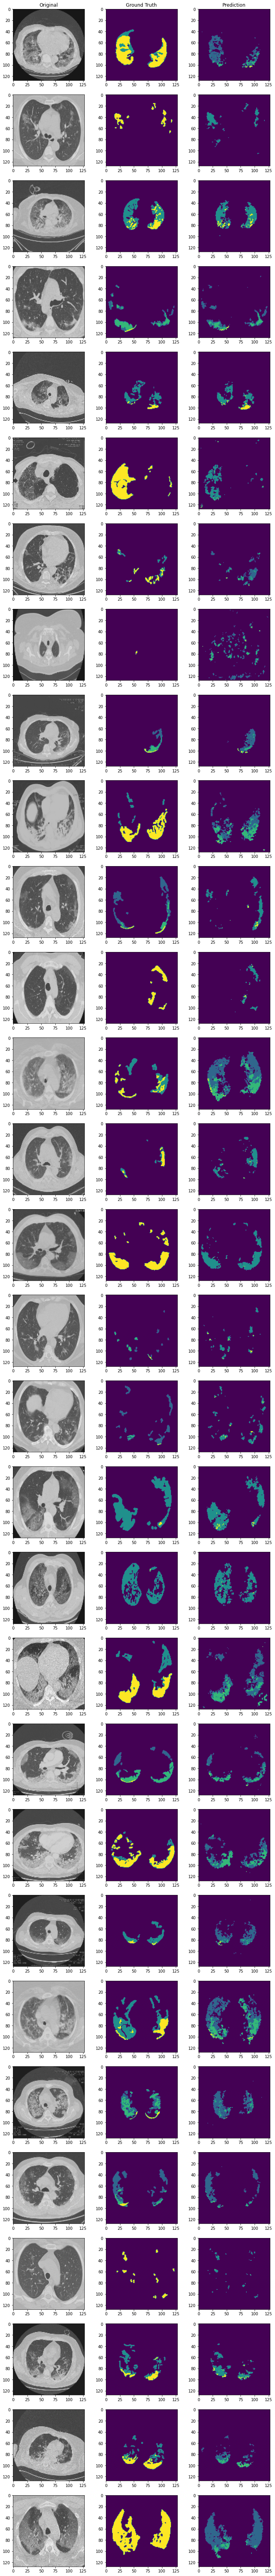

In [4]:
images = sorted(glob.glob("{}/*".format(test_images_dir)))
masks  = sorted(glob.glob("{}/*".format(test_masks_dir)))

dim = (img_width, img_height)

num_images = len(images)
num_cols   = 3

col_names = [
    "Original",
    "Ground Truth",
    "Prediction"
]

fig, axes = plt.subplots(nrows=num_images, ncols=num_cols, figsize=(num_cols*4, num_images*4))

for ax, col in zip(axes[0], col_names):
    ax.set_title(col)
    
counter = 0

scores = []

for i in range(num_images):
    image_file = images[i]
    mask_file  = masks[i]
    
    img  = get_image(image_file, dim)
    mask = get_mask(mask_file, dim)
    
    prediction = get_predicted_img(img, model)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(img)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(mask)
    
    counter += 1
    
    plt.subplot(num_images, num_cols, counter)
    plt.imshow(prediction)
    
    macro_score = jaccard_score(mask.ravel(), prediction.ravel(), average='macro')
    label_score = jaccard_score(mask.ravel(), prediction.ravel(), average=None)
    
    scores.append({
        'image_file':  image_file,
        'mask_file':   mask_file,
        'macro_score': macro_score,
        'label_score': label_score
    })

plt.show()

In [5]:
df_scores = pd.DataFrame(scores)

df_scores

,image_file,mask_file,macro_score,label_score
0,./tmp/test/images/scan_slice00.png,./tmp/test/masks/scan_slice00.tiff,0.264817,"[0.9205953707953577, 0.055858310626702996, 0.0..."
1,./tmp/test/images/scan_slice04.png,./tmp/test/masks/scan_slice04.tiff,0.493012,"[0.9806543916397114, 0.49838187702265374, 0.0]"
2,./tmp/test/images/scan_slice09.png,./tmp/test/masks/scan_slice09.tiff,0.558822,"[0.9591647945024449, 0.5376146788990825, 0.179..."
3,./tmp/test/images/scan_slice10.png,./tmp/test/masks/scan_slice10.tiff,0.477573,"[0.9750814644431666, 0.30517711171662126, 0.43..."
4,./tmp/test/images/scan_slice12.png,./tmp/test/masks/scan_slice12.tiff,0.643454,"[0.9725524917783962, 0.5108820160366552, 0.446..."
5,./tmp/test/images/scan_slice15.png,./tmp/test/masks/scan_slice15.tiff,0.315433,"[0.9309705073251872, 0.009900990099009901, 0.0..."
6,./tmp/test/images/scan_slice18.png,./tmp/test/masks/scan_slice18.tiff,0.349582,"[0.970520697573388, 0.2182468694096601, 0.2095..."
7,./tmp/test/images/scan_slice22.png,./tmp/test/masks/scan_slice22.tiff,0.240536,"[0.9498045920859794, 0.0018867924528301887, 0...."
8,./tmp/test/images/scan_slice26.png,./tmp/test/masks/scan_slice26.tiff,0.428150,"[0.9778785807493942, 0.26900584795321636, 0.25..."
9,./tmp/test/images/scan_slice30.png,./tmp/test/masks/scan_slice30.tiff,0.345839,"[0.9275485516249264, 0.09782608695652174, 0.35..."
